#**Import Data**


In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# import data
df = pd.read_csv('loan_data.csv')

In [3]:
### one hot-encoding for categorical variable "purpose"
df_dummies = pd.get_dummies(df.purpose, drop_first=True)

In [4]:
df_merged = pd.concat([df,df_dummies],axis='columns')
# drop original purpose column and one dummy variable to avoid multicollinearity (dummy-varialb trap)
df_merged_final = df_merged.drop('purpose', axis='columns')
df_merged_final.rename(columns={'not.fully.paid':'repaid'}, inplace=True)
df_merged.rename(columns={'not.fully.paid':'repaid'}, inplace=True)
# Transform dependent variable, so that 1 means loan = repaid and 0 = not repaid
#df_plot = df_merged_final
#df_plot['repaid'].replace({1: 22}, inplace=True)
#df_plot['repaid'].replace({0: 33}, inplace=True)
#df_plot['repaid'].replace({33: 1, 22:0}, inplace=True)

In [5]:
df_merged_final['repaid'].value_counts()

0    8045
1    1533
Name: repaid, dtype: int64

In [6]:
# create normalized dataframe
x = df_merged_final.values #transforms df into np array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_merged_final_norm = pd.DataFrame(x_scaled)

**Target Column Value Distribution**

Text(0.5, 1.0, 'Dependent Variable Repaid: Value Distribution')

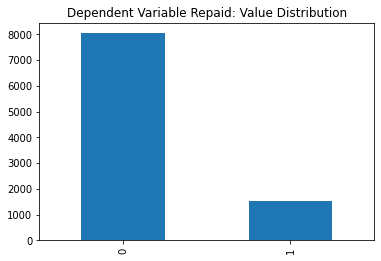

In [7]:
df_merged_final.repaid.value_counts().plot.bar()
plt.title('Dependent Variable Repaid: Value Distribution')

**Rename columns of normalized dataframe**

In [8]:
# prepare dictionary to rename the columns
col_names_old = []
for col_name in df_merged_final_norm.columns: 
    col_names_old.append(col_name)

col_names_new = []
for col_name in df_merged_final.columns: 
    col_names_new.append(col_name)

# create dictionary out of two lists
keys = col_names_old
values = col_names_new
col_names_dict = dict(zip(keys, values))

# rename columns
df_merged_final_norm.rename(columns = col_names_dict, inplace = True)

# Check, if 1 - 0 swap has been successful
df_merged_final['repaid'].value_counts() == df_merged_final_norm['repaid'].value_counts()
#df['not.fully.paid'].value_counts()  

0    True
1    True
Name: repaid, dtype: bool

In [9]:
df_merged_final_norm['repaid'].value_counts()

0.0    8045
1.0    1533
Name: repaid, dtype: int64

**Add column fico_rating**

Text(0.5, 1.0, 'Loan Repayment by Fico Rating')

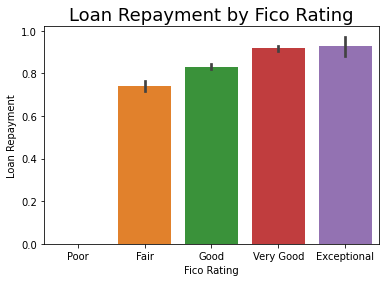

In [10]:
# add column fico_rating
bins = [300,579,669,739,799,850]
group_names = ['Poor','Fair','Good','Very Good','Exceptional']
df_merged_final['fico_rating'] = pd.cut(df_merged_final['fico'], bins, labels=group_names)
df_plot = df_merged_final
df_plot['fico_rating'] = pd.cut(df_merged_final['fico'], bins, labels=group_names)
df['fico_rating'] = pd.cut(df_merged_final['fico'], bins, labels=group_names)

# Transform dependent variable, so that 1 means loan = repaid and 0 = not repaid
df_plot = df_merged_final
df_plot['repaid'].replace({1: 22}, inplace=True)
df_plot['repaid'].replace({0: 33}, inplace=True)
df_plot['repaid'].replace({33: 1, 22:0}, inplace=True)

sns.barplot(x='fico_rating',y='repaid',data=df_plot)
plt.xlabel('Fico Rating')
plt.ylabel('Loan Repayment')
plt.title('Loan Repayment by Fico Rating', size = 18)

In [11]:
df_merged = pd.concat([df,df_dummies],axis='columns')
# drop original purpose column and one dummy variable to avoid multicollinearity (dummy-varialb trap)
df_merged_final = df_merged.drop('purpose', axis='columns')
df_merged_final.rename(columns={'not.fully.paid':'repaid'}, inplace=True)
df_merged.rename(columns={'not.fully.paid':'repaid'}, inplace=True)

In [12]:
df_merged_final['repaid'].value_counts()

0    8045
1    1533
Name: repaid, dtype: int64

In [13]:
df_merged_final_norm['repaid'].value_counts()

0.0    8045
1.0    1533
Name: repaid, dtype: int64

In [14]:
df_dummies_2 = pd.get_dummies(df_merged_final.fico_rating, drop_first = True)

In [15]:
df_merged_2 = pd.concat([df_merged_final,df_dummies_2],axis='columns')
df_merged_final_2 = df_merged_2.drop('fico_rating', axis='columns')
df_merged_final_2.corr()['repaid'].abs().sort_values(ascending=False)

repaid                1.000000
int.rate              0.159552
credit.policy         0.158119
fico                  0.149666
inq.last.6mths        0.149452
Very Good             0.112275
Fair                  0.107802
small_business        0.084460
revol.util            0.082088
revol.bal             0.053699
installment           0.049955
pub.rec               0.048634
credit_card           0.047136
dti                   0.037362
log.annual.inc        0.033439
Exceptional           0.030801
days.with.cr.line     0.029237
major_purchase        0.028580
Good                  0.026236
educational           0.021609
debt_consolidation    0.017543
delinq.2yrs           0.008881
home_improvement      0.007272
Name: repaid, dtype: float64

**Create dataframe without outliers**

In [16]:
# Create dataframe without outliers
df_dropout = df_merged_final

#Drops outliers
df_dropout = df_dropout.drop(axis=0, index=[1544, 2945, 3602, 3647, 3658, 3713, 3991, 4064, 4372, 4479, 4694, 4731, 4761, 4841, 4958, 5093, 5135, 5274, 5325, 5336, 5363, 5364, 5479, 5540, 5679, 5839, 5868, 6057, 6172, 6202, 6212, 6284, 6341, 6357, 6422, 6432, 6467, 6517, 6528, 6661, 7007, 7163, 7313, 7361, 7527, 7687, 8822, 8824, 8872, 8924, 8931, 8939, 8967, 8994, 9008, 9011, 9014, 9042, 9049, 9054, 9063, 9145, 9155, 9180, 9196, 9202, 9208, 9216, 9248, 9263, 9281, 9286, 9288, 9295, 9305, 9309, 9314, 9328, 9332, 9337, 9346, 9350, 9372, 9393, 9409, 9445, 9459, 9474, 9476, 9524, 9531, 9549, 9566, 9568])
df_dropout = df_dropout.drop(axis=0, index=[160, 237, 249, 271, 275, 322, 399, 405, 521, 636, 670, 702, 794, 810, 837, 1380, 1385, 1474, 1509, 1565, 1585, 1674, 1683, 1766, 1786, 2122, 2152, 2340, 2382, 2517, 2594, 2641, 2694, 2730, 2781, 2851, 3028, 3079, 3136, 3349, 3397, 3431, 3444, 3456, 3572, 3655, 3699, 3716, 3736, 3788, 3789, 3865, 3887, 4019, 4094, 4100, 4668, 4756, 4869, 4888, 4903, 4909, 4911, 4925, 4926, 4929, 4962, 4988, 5095, 5100, 5115, 5170, 5186, 5224, 5225, 5239, 5255, 5258, 5292, 5293, 5309, 5345, 5373, 5420, 5432, 5499, 5516, 5596, 5598, 5620, 5674, 5686, 5811, 5854, 5888, 5889, 5896, 5899, 5971, 6011, 6080, 6101, 6107, 6146, 6181, 6204, 6224, 6228, 6243, 6328, 6360, 6418, 6452, 6476, 6501, 6505, 6627, 6640, 6648, 6659, 6681, 6687, 6721, 6742, 6754, 6771, 6777, 6799, 6821, 6828, 6848, 6920, 6927, 6929, 6945, 6949, 6969, 7016, 7019, 7026, 7040, 7052, 7161, 7164, 7171, 7228, 7239, 7263, 7278, 7321, 7342, 7345, 7348, 7353, 7366, 7371, 7400, 7418, 7422, 7424, 7470, 7510, 7572, 7604, 7608, 7614, 7708, 7709, 7893, 7921, 7953, 7963, 7987, 8014, 8034, 8070, 8247, 8262, 8275, 8283, 8400, 8450, 8837, 8841, 8842, 8845, 8846, 8857, 8860, 8933, 9023, 9032, 9067, 9073, 9132, 9158, 9168, 9184, 9195, 9279, 9280, 9297, 9312, 9334, 9343, 9347, 9348, 9363, 9366, 9373, 9379, 9380, 9404, 9410, 9420, 9495, 9510, 9527, 9533, 9539, 9554, 9577])
df_dropout = df_dropout.drop(axis=0, index=[25, 46, 130, 132, 134, 165, 187, 193, 263, 289, 304, 312, 383, 411, 479, 543, 644, 653, 832, 893, 1050, 1085, 1114, 1420, 1582, 1654, 1701, 1719, 1782, 1859, 1898, 1955, 1968, 2113, 2185, 2197, 2212, 2277, 2383, 2660, 2722, 2768, 2844, 2871, 2961, 3017, 3032, 3046, 3122, 3172, 3249, 3273, 3350, 3607, 3646, 3680, 3720, 3818, 3908, 3979, 4129, 4136, 4197, 4280, 4292, 4301, 4329, 4482, 4523, 4737, 4887, 5039, 5098, 5106, 5111, 5181, 5210, 5245, 5270, 5320, 5323, 5436, 5443, 5493, 5521, 5584, 5673, 5715, 5780, 5791, 5819, 5827, 5864, 5881, 5975, 6002, 6100, 6257, 6287, 6318, 6352, 6371, 6398, 6531, 6541, 6566, 6570, 6572, 6623, 6633, 6653, 6670, 6712, 6730, 6841, 6842, 6861, 7023, 7066, 7106, 7135, 7146, 7311, 7457, 7494, 7564, 7588, 7652, 7682, 7704, 7732, 7737, 7746, 7749, 7759, 7760, 7761, 7771, 7777, 7781, 7785, 7786, 7798, 7799, 7800, 7803, 7811, 7822, 7824, 7825, 7826, 7872, 7897, 7907, 7933, 7956, 7974, 7977, 7988, 8020, 8049, 8053, 8054, 8065, 8077, 8086, 8111, 8134, 8167, 8171, 8235, 8284, 8340, 8352, 8363, 8415, 8438, 8460, 8483, 8559, 8644, 8678, 8765, 8813, 8833, 8852, 8865, 8886, 8895, 8898, 8950, 8965, 8975, 9018, 9050, 9090, 9107, 9134, 9183, 9229, 9273, 9299, 9306, 9307, 9369, 9400, 9407, 9462, 9535, 9536, 9569])
df_dropout = df_dropout.drop(axis=0, index=[154, 1477, 1613, 1883, 2476, 2495])
df_dropout = df_dropout.drop(axis=0, index=[21, 55, 92, 96, 113, 144, 169, 178, 192, 203, 225, 227, 267, 286, 370, 433, 475, 476, 502, 632, 672, 673, 681, 764, 851, 890, 919, 939, 955, 957, 962, 991, 997, 1046, 1083, 1092, 1138, 1153, 1216, 1223, 1265, 1317, 1330, 1378, 1379, 1534, 1537, 1597, 1600, 1679, 1685, 1687, 1799, 1806, 1811, 1815, 1918, 1937, 1961, 1964, 1976, 2017, 2073, 2081, 2103, 2127, 2229, 2233, 2236, 2255, 2260, 2317, 2334, 2341, 2435, 2460, 2506, 2518, 2573, 2610, 2653, 2663, 2695, 2711, 2714, 2743, 2744, 2799, 2803, 2807, 2812, 2864, 2885, 2887, 2906, 2928, 2947, 2989, 2993, 3010, 3117, 3139, 3163, 3175, 3188, 3197, 3228, 3258, 3326, 3389, 3398, 3409, 3423, 3457, 3459, 3476, 3496, 3509, 3514, 3539, 3545, 3551, 3566, 3579, 3708, 3729, 3765, 3781, 3800, 3878, 3885, 3896, 3936, 3967, 3977, 4041, 4046, 4089, 4120, 4251, 4322, 4326, 4335, 4373, 4390, 4396, 4452, 4468, 4474, 4492, 4530, 4562, 4573, 4580, 4604, 4675, 4700, 4778, 4823, 4832, 4855, 4865, 4904, 4907, 4919, 4952, 4996, 5012, 5018, 5075, 5117, 5157, 5191, 5211, 5260, 5299, 5301, 5310, 5316, 5319, 5332, 5342, 5348, 5456, 5470, 5483, 5518, 5560, 5562, 5664, 5666, 5747, 5766, 5795, 5801, 5816, 5855, 5857, 5860, 5870, 5877, 5880, 5956, 5965, 6014, 6078, 6220, 6231, 6276, 6282, 6283, 6288, 6312, 6316, 6319, 6408, 6416, 6434, 6480, 6491, 6496, 6533, 6540, 6544, 6568, 6585, 6590, 6599, 6607, 6645, 6690, 6703, 6719, 6768, 6775, 6781, 6798, 6814, 6835, 6838, 6849, 6880, 6884, 6911, 6943, 6960, 6977, 6991, 7009, 7056, 7067, 7187, 7199, 7303, 7391, 7441, 7492, 7497, 7528, 7553, 7554, 7560, 7601, 7607, 7610, 7668, 7853, 7920, 8013, 8163, 8185, 8189, 8193, 8231, 8308, 8310, 8354, 8430, 8495, 8502, 8503, 8518, 8531, 8602, 8662, 8663, 8670, 8744, 8830, 8844, 8861, 8870, 8871, 8884, 8894, 8932, 9006, 9053, 9085, 9126, 9149, 9156, 9174, 9191, 9210, 9220, 9231, 9239, 9277, 9294, 9296, 9336, 9370, 9386, 9419, 9421, 9458, 9491, 9540, 9573])
df_dropout = df_dropout.drop(axis=0, index=[5, 8, 29, 34, 39, 40, 57, 58, 73, 99, 109, 146, 148, 155, 164, 191, 198, 259, 306, 316, 342, 393, 403, 407, 425, 426, 432, 448, 472, 507, 517, 523, 549, 565, 577, 578, 719, 759, 769, 777, 784, 799, 801, 802, 820, 835, 863, 896, 897, 912, 963, 971, 980, 985, 992, 993, 998, 1006, 1057, 1061, 1084, 1099, 1100, 1106, 1122, 1149, 1183, 1212, 1256, 1260, 1304, 1305, 1316, 1335, 1362, 1364, 1372, 1423, 1432, 1435, 1439, 1443, 1488, 1515, 1541, 1551, 1561, 1579, 1590, 1594, 1605, 1607, 1608, 1621, 1633, 1639, 1675, 1686, 1714, 1716, 1721, 1727, 1739, 1752, 1755, 1764, 1774, 1784, 1834, 1856, 1865, 1890, 1893, 1910, 1911, 1919, 1921, 1922, 1939, 1960, 1966, 1972, 1977, 2020, 2034, 2051, 2060, 2072, 2096, 2099, 2115, 2123, 2158, 2193, 2330, 2381, 2421, 2434, 2437, 2438, 2439, 2468, 2469, 2478, 2480, 2490, 2569, 2654, 2661, 2673, 2676, 2729, 2745, 2747, 2749, 2751, 2753, 2772, 2777, 2804, 2832, 2846, 2883, 2920, 2991, 3003, 3008, 3036, 3044, 3062, 3073, 3088, 3089, 3101, 3155, 3190, 3224, 3236, 3251, 3259, 3267, 3269, 3284, 3302, 3375, 3376, 3436, 3454, 3485, 3513, 3515, 3552, 3604, 3633, 3643, 3654, 3666, 3675, 3738, 3749, 3802, 3824, 3849, 3898, 3900, 3925, 3961, 3964, 3996, 3998, 4001, 4012, 4016, 4088, 4108, 4147, 4160, 4161, 4231, 4262, 4315, 4319, 4337, 4346, 4349, 4379, 4385, 4398, 4405, 4434, 4444, 4462, 4463, 4481, 4540, 4551, 4585, 4593, 4599, 4610, 4615, 4635, 4660, 4684, 4685, 4687, 4711, 4714, 4721, 4747, 4757, 4763, 4779, 4786, 4793, 4808, 4813, 4850, 4851, 4866, 4872, 4882, 4897, 4905, 4916, 4931, 4934, 4971, 4978, 4980, 5006, 5020, 5026, 5030, 5077, 5081, 5083, 5102, 5133, 5144, 5177, 5251, 5288, 5297, 5366, 5371, 5492, 5511, 5549, 5563, 5590, 5638, 5643, 5657, 5668, 5694, 5732, 5735, 5741, 5753, 5800, 5818, 5824, 5897, 5908, 5915, 5948, 5997, 5998, 6008, 6009, 6035, 6048, 6069, 6073, 6088, 6095, 6096, 6109, 6180, 6182, 6199, 6225, 6233, 6271, 6308, 6337, 6350, 6355, 6376, 6390, 6435, 6436, 6442, 6471, 6474, 6519, 6525, 6536, 6548, 6550, 6592, 6594, 6642, 6695, 6701, 6704, 6722, 6726, 6732, 6743, 6758, 6762, 6782, 6851, 6868, 6900, 6934, 6965, 6984, 7011, 7147, 7150, 7154, 7160, 7167, 7174, 7203, 7225, 7240, 7302, 7316, 7362, 7367, 7395, 7413, 7429, 7460, 7466, 7503, 7520, 7631, 7649, 7654, 7659, 7664, 7697, 7711, 7719, 7756, 7838, 7840, 7863, 7876, 7900, 7917, 7928, 7946, 7983, 8003, 8015, 8021, 8036, 8087, 8106, 8131, 8145, 8155, 8159, 8165, 8168, 8173, 8198, 8204, 8211, 8224, 8226, 8230, 8233, 8243, 8250, 8257, 8258, 8261, 8271, 8274, 8280, 8292, 8303, 8311, 8313, 8314, 8321, 8326, 8328, 8349, 8356, 8376, 8381, 8383, 8385, 8393, 8403, 8416, 8418, 8424, 8440, 8447, 8463, 8494, 8498, 8509, 8515, 8539, 8540, 8542, 8544, 8556, 8560, 8561, 8568, 8580, 8585, 8589, 8597, 8618, 8636, 8637, 8638, 8639, 8653, 8659, 8669, 8696, 8711, 8720, 8728, 8729, 8753, 8764, 8771, 8790, 8794, 8800, 8810, 8812, 8815, 8817, 8825, 8829, 8839, 8847, 8859, 8874, 8878, 8883, 8897, 8899, 8901, 8911, 8919, 8920, 8923, 8934, 8943, 8956, 8959, 8966, 8978, 8981, 9002, 9022, 9029, 9036, 9037, 9047, 9071, 9074, 9082, 9087, 9089, 9099, 9106, 9111, 9112, 9113, 9117, 9119, 9130, 9138, 9142, 9147, 9160, 9162, 9173, 9175, 9176, 9189, 9197, 9200, 9203, 9204, 9207, 9209, 9237, 9254, 9256, 9261, 9265, 9268, 9269, 9301, 9308, 9311, 9315, 9317, 9329, 9333, 9339, 9344, 9349, 9353, 9362, 9375, 9382, 9387, 9389, 9403, 9406, 9414, 9415, 9416, 9424, 9427, 9428, 9429, 9431, 9435, 9436, 9446, 9453, 9456, 9461, 9464, 9466, 9469, 9471, 9487, 9494, 9501, 9504, 9519, 9520, 9522, 9526, 9529, 9551, 9553, 9557, 9564])
df_dropout = df_dropout.drop(axis=0, index=[360, 462, 1051, 1204, 1266, 1285, 1310, 1358, 1505, 1619, 1665, 1761, 1762, 1781, 2014, 2140, 2467, 2500, 2757, 3068, 3102, 3177, 3340, 3933, 3980, 4407, 4679, 4707, 4828, 4842, 4999, 5127, 5482, 5512, 5544, 6866, 7714, 7715, 7727, 7728, 7735, 7738, 7758, 7762, 7763, 7766, 7768, 7770, 7774, 7776, 7787, 7788, 7789, 7795, 7805, 7810, 7815, 7817, 7818, 7833, 7846, 7849, 7859, 7865, 7873, 7874, 7879, 7881, 7882, 7886, 7889, 7890, 7892, 7901, 7906, 7908, 7913, 7916, 7919, 7922, 7927, 7930, 7935, 7936, 7938, 7939, 7945, 7948, 7955, 7957, 7959, 7965, 7966, 7967, 7970, 7976, 7980, 7989, 7992, 7994, 7997, 7999, 8000, 8002, 8006, 8007, 8018, 8024, 8026, 8037, 8039, 8045, 8051, 8052, 8059, 8061, 8062, 8063, 8066, 8068, 8069, 8081, 8092, 8094, 8099, 8104, 8109, 8110, 8112, 8115, 8116, 8122, 8123, 8124, 8125, 8127, 8128, 8129, 8138, 8141, 8144, 8150, 8158, 8162, 8176, 8186, 8190, 8201, 8215, 8220, 8223, 8234, 8238, 8242, 8248, 8252, 8263, 8265, 8277, 8293, 8296, 8297, 8306, 8312, 8316, 8322, 8324, 8331, 8334, 8337, 8338, 8345, 8350, 8362, 8364, 8366, 8368, 8369, 8372, 8375, 8387, 8388, 8395, 8398, 8402, 8404, 8406, 8409, 8425, 8436, 8442, 8445, 8448, 8453, 8458, 8465, 8472, 8473, 8474, 8475, 8476, 8486, 8489, 8490, 8497, 8501, 8506, 8507, 8522, 8523, 8524, 8525, 8530, 8537, 8543, 8555, 8570, 8576, 8577, 8596, 8610, 8617, 8622, 8628, 8642, 8647, 8652, 8664, 8666, 8674, 8679, 8680, 8692, 8701, 8706, 8707, 8709, 8712, 8723, 8725, 8746, 8762, 8766, 8770, 8783, 8793, 8816, 8827, 8832, 8835, 8836, 8843, 8849, 8853, 8867, 8880, 8882, 8887, 8890, 8892, 8900, 8915, 8916, 8922, 8925, 8928, 8930, 8938, 8942, 8948, 8960, 8963, 8972, 8974, 8977, 8984, 8987, 8989, 8992, 8993, 8996, 8998, 9000, 9004, 9005, 9012, 9015, 9017, 9020, 9025, 9030, 9033, 9048, 9051, 9057, 9072, 9083, 9093, 9104, 9109, 9129, 9133, 9135, 9136, 9140, 9141, 9143, 9157, 9163, 9170, 9178, 9193, 9199, 9212, 9215, 9219, 9221, 9222, 9227, 9230, 9234, 9235, 9243, 9244, 9246, 9249, 9252, 9262, 9264, 9266, 9287, 9300, 9303, 9318, 9322, 9325, 9327, 9341, 9342, 9345, 9357, 9358, 9365, 9367, 9374, 9381, 9384, 9391, 9394, 9397, 9405, 9412, 9417, 9422, 9426, 9430, 9434, 9437, 9444, 9447, 9448, 9449, 9452, 9457, 9463, 9467, 9470, 9472, 9481, 9483, 9484, 9485, 9492, 9498, 9502, 9515, 9537, 9538, 9548, 9560, 9562, 9565, 9572, 9575])

x_2 = df_dropout.drop('fico_rating',axis='columns').values #transforms df into np array
min_max_scaler_2 = preprocessing.MinMaxScaler()
x_scaled_2 = min_max_scaler_2.fit_transform(x_2)
df_dropout = pd.DataFrame(x_scaled_2)

# prepare dictionary to rename the columns
col_names_old = []
for col_name in df_dropout.columns: 
    col_names_old.append(col_name)

col_names_new = []
for col_name in df_merged_final_norm.columns: 
    col_names_new.append(col_name)

# create dictionary out of two lists
keys = col_names_old
values = col_names_new
col_names_dict = dict(zip(keys, values))

# rename columns
df_dropout.rename(columns = col_names_dict, inplace = True)
df_dropout

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,repaid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1.0,0.458009,0.991311,0.644037,0.651505,0.600,0.551509,0.707535,0.478860,0.0,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.366252,0.259012,0.552039,0.477926,0.450,0.260603,0.824477,0.704963,0.0,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.588647,0.427974,0.309018,0.388963,0.325,0.457573,0.086094,0.235294,0.2,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.317263,0.178724,0.644037,0.270903,0.475,0.254538,0.825556,0.672794,0.2,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.642302,0.106308,0.626659,0.500669,0.250,0.392523,0.116231,0.363051,0.0,0.090909,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,0.0,0.552877,0.104261,0.512964,0.275251,0.350,0.263637,0.037125,0.126838,1.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7737,0.0,0.832815,0.119360,0.402273,0.938462,0.275,0.306062,0.631642,0.586397,1.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7738,0.0,0.752722,0.177103,0.601114,0.267559,0.300,0.712120,0.169417,0.268382,0.8,0.000000,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7739,0.0,0.507776,0.294940,0.572519,0.007023,0.525,0.424240,0.004512,0.010110,1.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Data Cleaning, Data Visualizations Part 1**

In [42]:
# Show descriptive statistics of data
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


In [43]:
# Show data's null values
df.isnull().sum(axis = 0)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
fico_rating          0
dtype: int64

**Check for outliers**

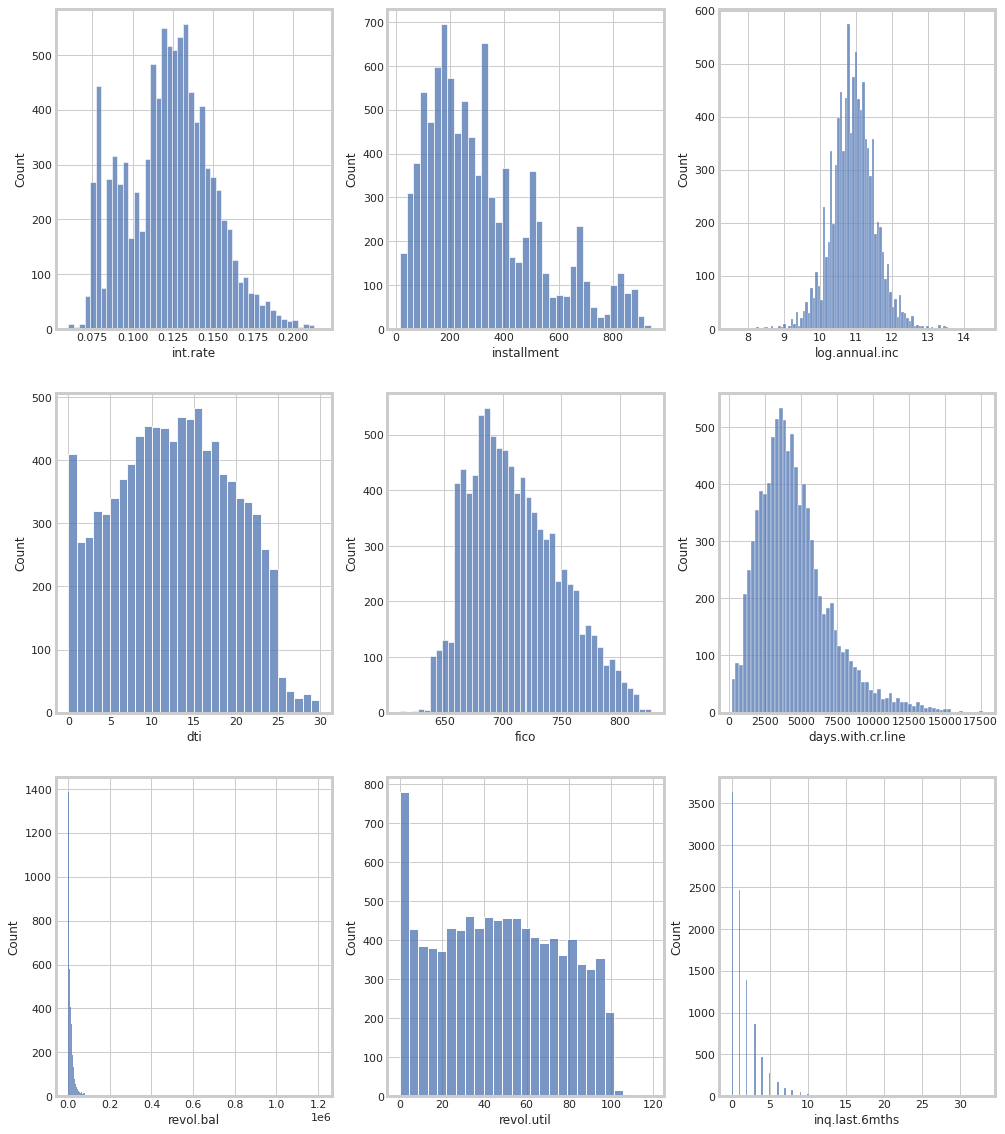

In [44]:
#Histogram plot of variables

f, axes = plt.subplots(3, 3,figsize=(15, 20))
sns.set_theme(style="whitegrid")
sns.histplot(x=df['int.rate'],ax=axes[0,0])
sns.histplot(x=df['installment'],ax=axes[0,1])
sns.histplot(x=df['log.annual.inc'],ax=axes[0,2])
sns.histplot(x=df['dti'],ax=axes[1,0])
sns.histplot(x=df['fico'],ax=axes[1,1])
sns.histplot(x=df['days.with.cr.line'],ax=axes[1,2])
sns.histplot(x=df['revol.bal'],ax=axes[2,0])
sns.histplot(x=df['revol.util'],ax=axes[2,1])
sns.histplot(x=df['inq.last.6mths'],ax=axes[2,2])

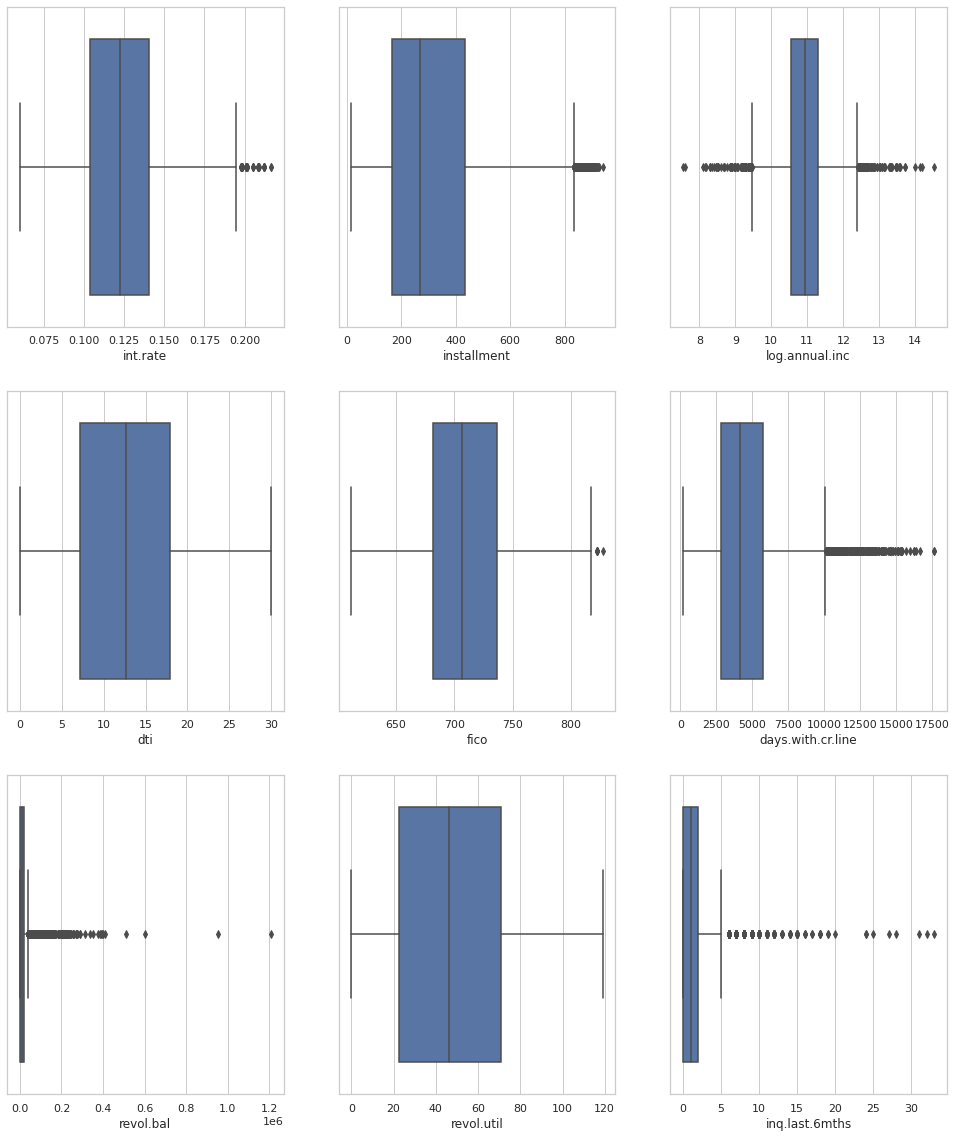

In [45]:
#Boxplot of variables

f, axes = plt.subplots(3, 3,figsize=(15, 20))
sns.set_theme(style="darkgrid")
sns.boxplot(x=df['int.rate'],ax=axes[0,0])
sns.boxplot(x=df['installment'],ax=axes[0,1])
sns.boxplot(x=df['log.annual.inc'],ax=axes[0,2])
sns.boxplot(x=df['dti'],ax=axes[1,0])
sns.boxplot(x=df['fico'],ax=axes[1,1])
sns.boxplot(x=df['days.with.cr.line'],ax=axes[1,2])
sns.boxplot(x=df['revol.bal'],ax=axes[2,0])
sns.boxplot(x=df['revol.util'],ax=axes[2,1])
sns.boxplot(x=df['inq.last.6mths'],ax=axes[2,2])

**Determine value for whiskers, quartiles and median for each variable**

               label  lower_whisker  lower_quartile  median  upper_quartile  \
0           int.rate           0.06            0.10    0.12            0.14   
1        installment          15.67          163.77  268.95          432.76   
2     log.annual.inc           9.47           10.56   10.93           11.29   
3                dti           0.00            7.21   12.66           17.95   
4               fico         612.00          682.00  707.00          737.00   
5  days.with.cr.line         178.96         2820.00 4139.96         5730.00   
6          revol.bal           0.00         3187.00 8596.00        18249.50   
7         revol.util           0.00           22.60   46.30           70.90   
8     inq.last.6mths           0.00            0.00    1.00            2.00   

   upper_whisker  
0           0.19  
1         836.23  
2          12.39  
3          29.96  
4         817.00  
5       10080.00  
6       40781.00  
7         119.00  
8           5.00  


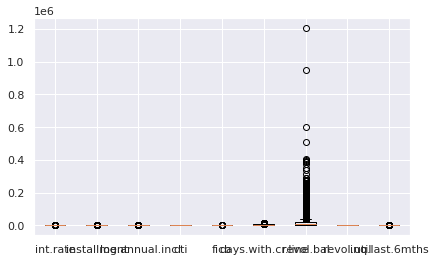

In [46]:
# Determing value for whiskers, quartiles and median for each variable

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

data1 = df['int.rate']
data2 = df['installment']
data3 = df['log.annual.inc']
data4 = df['dti']
data5 = df['fico']
data6 = df['days.with.cr.line']
data7 = df['revol.bal']
data8 = df['revol.util']
data9 = df['inq.last.6mths']


labels = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']
bp = plt.boxplot([data1, data2, data3, data4, data5, data6, data7, data8, data9], labels=labels) #<-- The boxplot
pd.set_option("display.max_columns", 6) #expanding dataframe, so all colums are shown
pd.set_option('precision', 2) #Only two decimals are used in the table
print(get_box_plot_data(labels, bp))
plt.show()

**Number of outliers in each variable**

In [47]:
# Number of outliers in each variable
outliers1 = 0
outliers2 = 0
outliers3 = 0
outliers4 = 0
outliers5 = 0
outliers6 = 0
outliers7 = 0
outliers8 = 0
outliers9 = 0

for index, rows in df.iterrows():
  if rows["int.rate"] < 0.06 or rows["int.rate"]> 0.19:
    outliers1 = outliers1 + 1
    #print(index, end=", ")
  if rows["installment"] < 15.67 or rows["installment"]> 836.23:
    outliers2 = outliers2 + 1
    #print(index, end=", ")
  if rows["log.annual.inc"] < 9.47 or rows["log.annual.inc"]> 12.39:
    outliers3 = outliers3 + 1
    #print(index, end=", ")
  if rows["dti"] < 0 or rows["dti"]> 29.96:
    outliers4 = outliers4 + 1
    #print(index, end=", ")
  if rows["fico"] < 612 or rows["fico"]> 817:
    outliers5 = outliers5 + 1
    #print(index, end=", ")
  if rows["days.with.cr.line"] < 178.96 or rows["days.with.cr.line"]> 10080:
    outliers6 = outliers6 + 1
    #print(index, end=", ")
  if rows["revol.bal"] < 0 or rows["revol.bal"]> 40781:
    outliers7 = outliers7 + 1
    #print(index, end=", ")
  if rows["revol.util"] < 0 or rows["revol.util"]> 119:
    outliers8 = outliers8 + 1
    #print(index, end=", ")
  if rows["inq.last.6mths"] < 0 or rows["inq.last.6mths"]> 5:
    outliers9 = outliers9 + 1
    #print(index, end=", ")

#print(index, rows["int.rate"]) <-- Can be used to check wich observations is an outlier

print("int.rate - outliers: ",outliers1)
print("Installment - outliers: ",outliers2)
print("log.annual.inc - outliers: ",outliers3)
print("dti - outliers: ",outliers4)
print("fico - outliers: ",outliers5)
print("days.with.cr.line - outliers: ",outliers6)
print("revol.bal - outliers: ",outliers7)
print("revol.util - outliers: ",outliers8)
print("inq.last.6mths - outliers: ",outliers9)

int.rate - outliers:  94
Installment - outliers:  236
log.annual.inc - outliers:  239
dti - outliers:  0
fico - outliers:  6
days.with.cr.line - outliers:  347
revol.bal - outliers:  780
revol.util - outliers:  0
inq.last.6mths - outliers:  478


**Visualization with outliers**

In [48]:
# See Feature-values for each observation 
outlier = df.iloc[9535,:]
print(outlier)

credit.policy                     0
purpose              small_business
int.rate                       0.15
installment                  831.52
log.annual.inc                12.77
dti                           11.38
fico                            717
days.with.cr.line           8520.04
revol.bal                   1207359
revol.util                    56.00
inq.last.6mths                    7
delinq.2yrs                       0
pub.rec                           0
not.fully.paid                    1
fico_rating                    Good
Name: 9535, dtype: object


**Create dummy variables**

In [49]:
dummies_ol = pd.get_dummies(df.purpose, drop_first = True)
df_ol = pd.concat([df,dummies_ol],axis='columns')

**Drop outliers from dataframe**

In [50]:
# Create dataframe without dependent variable
X = df_ol.drop(['not.fully.paid'], axis='columns')

#Drops outliers
X = X.drop(axis=0, index=[1544, 2945, 3602, 3647, 3658, 3713, 3991, 4064, 4372, 4479, 4694, 4731, 4761, 4841, 4958, 5093, 5135, 5274, 5325, 5336, 5363, 5364, 5479, 5540, 5679, 5839, 5868, 6057, 6172, 6202, 6212, 6284, 6341, 6357, 6422, 6432, 6467, 6517, 6528, 6661, 7007, 7163, 7313, 7361, 7527, 7687, 8822, 8824, 8872, 8924, 8931, 8939, 8967, 8994, 9008, 9011, 9014, 9042, 9049, 9054, 9063, 9145, 9155, 9180, 9196, 9202, 9208, 9216, 9248, 9263, 9281, 9286, 9288, 9295, 9305, 9309, 9314, 9328, 9332, 9337, 9346, 9350, 9372, 9393, 9409, 9445, 9459, 9474, 9476, 9524, 9531, 9549, 9566, 9568])
X = X.drop(axis=0, index=[160, 237, 249, 271, 275, 322, 399, 405, 521, 636, 670, 702, 794, 810, 837, 1380, 1385, 1474, 1509, 1565, 1585, 1674, 1683, 1766, 1786, 2122, 2152, 2340, 2382, 2517, 2594, 2641, 2694, 2730, 2781, 2851, 3028, 3079, 3136, 3349, 3397, 3431, 3444, 3456, 3572, 3655, 3699, 3716, 3736, 3788, 3789, 3865, 3887, 4019, 4094, 4100, 4668, 4756, 4869, 4888, 4903, 4909, 4911, 4925, 4926, 4929, 4962, 4988, 5095, 5100, 5115, 5170, 5186, 5224, 5225, 5239, 5255, 5258, 5292, 5293, 5309, 5345, 5373, 5420, 5432, 5499, 5516, 5596, 5598, 5620, 5674, 5686, 5811, 5854, 5888, 5889, 5896, 5899, 5971, 6011, 6080, 6101, 6107, 6146, 6181, 6204, 6224, 6228, 6243, 6328, 6360, 6418, 6452, 6476, 6501, 6505, 6627, 6640, 6648, 6659, 6681, 6687, 6721, 6742, 6754, 6771, 6777, 6799, 6821, 6828, 6848, 6920, 6927, 6929, 6945, 6949, 6969, 7016, 7019, 7026, 7040, 7052, 7161, 7164, 7171, 7228, 7239, 7263, 7278, 7321, 7342, 7345, 7348, 7353, 7366, 7371, 7400, 7418, 7422, 7424, 7470, 7510, 7572, 7604, 7608, 7614, 7708, 7709, 7893, 7921, 7953, 7963, 7987, 8014, 8034, 8070, 8247, 8262, 8275, 8283, 8400, 8450, 8837, 8841, 8842, 8845, 8846, 8857, 8860, 8933, 9023, 9032, 9067, 9073, 9132, 9158, 9168, 9184, 9195, 9279, 9280, 9297, 9312, 9334, 9343, 9347, 9348, 9363, 9366, 9373, 9379, 9380, 9404, 9410, 9420, 9495, 9510, 9527, 9533, 9539, 9554, 9577])
X = X.drop(axis=0, index=[25, 46, 130, 132, 134, 165, 187, 193, 263, 289, 304, 312, 383, 411, 479, 543, 644, 653, 832, 893, 1050, 1085, 1114, 1420, 1582, 1654, 1701, 1719, 1782, 1859, 1898, 1955, 1968, 2113, 2185, 2197, 2212, 2277, 2383, 2660, 2722, 2768, 2844, 2871, 2961, 3017, 3032, 3046, 3122, 3172, 3249, 3273, 3350, 3607, 3646, 3680, 3720, 3818, 3908, 3979, 4129, 4136, 4197, 4280, 4292, 4301, 4329, 4482, 4523, 4737, 4887, 5039, 5098, 5106, 5111, 5181, 5210, 5245, 5270, 5320, 5323, 5436, 5443, 5493, 5521, 5584, 5673, 5715, 5780, 5791, 5819, 5827, 5864, 5881, 5975, 6002, 6100, 6257, 6287, 6318, 6352, 6371, 6398, 6531, 6541, 6566, 6570, 6572, 6623, 6633, 6653, 6670, 6712, 6730, 6841, 6842, 6861, 7023, 7066, 7106, 7135, 7146, 7311, 7457, 7494, 7564, 7588, 7652, 7682, 7704, 7732, 7737, 7746, 7749, 7759, 7760, 7761, 7771, 7777, 7781, 7785, 7786, 7798, 7799, 7800, 7803, 7811, 7822, 7824, 7825, 7826, 7872, 7897, 7907, 7933, 7956, 7974, 7977, 7988, 8020, 8049, 8053, 8054, 8065, 8077, 8086, 8111, 8134, 8167, 8171, 8235, 8284, 8340, 8352, 8363, 8415, 8438, 8460, 8483, 8559, 8644, 8678, 8765, 8813, 8833, 8852, 8865, 8886, 8895, 8898, 8950, 8965, 8975, 9018, 9050, 9090, 9107, 9134, 9183, 9229, 9273, 9299, 9306, 9307, 9369, 9400, 9407, 9462, 9535, 9536, 9569])
X = X.drop(axis=0, index=[154, 1477, 1613, 1883, 2476, 2495])
X = X.drop(axis=0, index=[21, 55, 92, 96, 113, 144, 169, 178, 192, 203, 225, 227, 267, 286, 370, 433, 475, 476, 502, 632, 672, 673, 681, 764, 851, 890, 919, 939, 955, 957, 962, 991, 997, 1046, 1083, 1092, 1138, 1153, 1216, 1223, 1265, 1317, 1330, 1378, 1379, 1534, 1537, 1597, 1600, 1679, 1685, 1687, 1799, 1806, 1811, 1815, 1918, 1937, 1961, 1964, 1976, 2017, 2073, 2081, 2103, 2127, 2229, 2233, 2236, 2255, 2260, 2317, 2334, 2341, 2435, 2460, 2506, 2518, 2573, 2610, 2653, 2663, 2695, 2711, 2714, 2743, 2744, 2799, 2803, 2807, 2812, 2864, 2885, 2887, 2906, 2928, 2947, 2989, 2993, 3010, 3117, 3139, 3163, 3175, 3188, 3197, 3228, 3258, 3326, 3389, 3398, 3409, 3423, 3457, 3459, 3476, 3496, 3509, 3514, 3539, 3545, 3551, 3566, 3579, 3708, 3729, 3765, 3781, 3800, 3878, 3885, 3896, 3936, 3967, 3977, 4041, 4046, 4089, 4120, 4251, 4322, 4326, 4335, 4373, 4390, 4396, 4452, 4468, 4474, 4492, 4530, 4562, 4573, 4580, 4604, 4675, 4700, 4778, 4823, 4832, 4855, 4865, 4904, 4907, 4919, 4952, 4996, 5012, 5018, 5075, 5117, 5157, 5191, 5211, 5260, 5299, 5301, 5310, 5316, 5319, 5332, 5342, 5348, 5456, 5470, 5483, 5518, 5560, 5562, 5664, 5666, 5747, 5766, 5795, 5801, 5816, 5855, 5857, 5860, 5870, 5877, 5880, 5956, 5965, 6014, 6078, 6220, 6231, 6276, 6282, 6283, 6288, 6312, 6316, 6319, 6408, 6416, 6434, 6480, 6491, 6496, 6533, 6540, 6544, 6568, 6585, 6590, 6599, 6607, 6645, 6690, 6703, 6719, 6768, 6775, 6781, 6798, 6814, 6835, 6838, 6849, 6880, 6884, 6911, 6943, 6960, 6977, 6991, 7009, 7056, 7067, 7187, 7199, 7303, 7391, 7441, 7492, 7497, 7528, 7553, 7554, 7560, 7601, 7607, 7610, 7668, 7853, 7920, 8013, 8163, 8185, 8189, 8193, 8231, 8308, 8310, 8354, 8430, 8495, 8502, 8503, 8518, 8531, 8602, 8662, 8663, 8670, 8744, 8830, 8844, 8861, 8870, 8871, 8884, 8894, 8932, 9006, 9053, 9085, 9126, 9149, 9156, 9174, 9191, 9210, 9220, 9231, 9239, 9277, 9294, 9296, 9336, 9370, 9386, 9419, 9421, 9458, 9491, 9540, 9573])
X = X.drop(axis=0, index=[5, 8, 29, 34, 39, 40, 57, 58, 73, 99, 109, 146, 148, 155, 164, 191, 198, 259, 306, 316, 342, 393, 403, 407, 425, 426, 432, 448, 472, 507, 517, 523, 549, 565, 577, 578, 719, 759, 769, 777, 784, 799, 801, 802, 820, 835, 863, 896, 897, 912, 963, 971, 980, 985, 992, 993, 998, 1006, 1057, 1061, 1084, 1099, 1100, 1106, 1122, 1149, 1183, 1212, 1256, 1260, 1304, 1305, 1316, 1335, 1362, 1364, 1372, 1423, 1432, 1435, 1439, 1443, 1488, 1515, 1541, 1551, 1561, 1579, 1590, 1594, 1605, 1607, 1608, 1621, 1633, 1639, 1675, 1686, 1714, 1716, 1721, 1727, 1739, 1752, 1755, 1764, 1774, 1784, 1834, 1856, 1865, 1890, 1893, 1910, 1911, 1919, 1921, 1922, 1939, 1960, 1966, 1972, 1977, 2020, 2034, 2051, 2060, 2072, 2096, 2099, 2115, 2123, 2158, 2193, 2330, 2381, 2421, 2434, 2437, 2438, 2439, 2468, 2469, 2478, 2480, 2490, 2569, 2654, 2661, 2673, 2676, 2729, 2745, 2747, 2749, 2751, 2753, 2772, 2777, 2804, 2832, 2846, 2883, 2920, 2991, 3003, 3008, 3036, 3044, 3062, 3073, 3088, 3089, 3101, 3155, 3190, 3224, 3236, 3251, 3259, 3267, 3269, 3284, 3302, 3375, 3376, 3436, 3454, 3485, 3513, 3515, 3552, 3604, 3633, 3643, 3654, 3666, 3675, 3738, 3749, 3802, 3824, 3849, 3898, 3900, 3925, 3961, 3964, 3996, 3998, 4001, 4012, 4016, 4088, 4108, 4147, 4160, 4161, 4231, 4262, 4315, 4319, 4337, 4346, 4349, 4379, 4385, 4398, 4405, 4434, 4444, 4462, 4463, 4481, 4540, 4551, 4585, 4593, 4599, 4610, 4615, 4635, 4660, 4684, 4685, 4687, 4711, 4714, 4721, 4747, 4757, 4763, 4779, 4786, 4793, 4808, 4813, 4850, 4851, 4866, 4872, 4882, 4897, 4905, 4916, 4931, 4934, 4971, 4978, 4980, 5006, 5020, 5026, 5030, 5077, 5081, 5083, 5102, 5133, 5144, 5177, 5251, 5288, 5297, 5366, 5371, 5492, 5511, 5549, 5563, 5590, 5638, 5643, 5657, 5668, 5694, 5732, 5735, 5741, 5753, 5800, 5818, 5824, 5897, 5908, 5915, 5948, 5997, 5998, 6008, 6009, 6035, 6048, 6069, 6073, 6088, 6095, 6096, 6109, 6180, 6182, 6199, 6225, 6233, 6271, 6308, 6337, 6350, 6355, 6376, 6390, 6435, 6436, 6442, 6471, 6474, 6519, 6525, 6536, 6548, 6550, 6592, 6594, 6642, 6695, 6701, 6704, 6722, 6726, 6732, 6743, 6758, 6762, 6782, 6851, 6868, 6900, 6934, 6965, 6984, 7011, 7147, 7150, 7154, 7160, 7167, 7174, 7203, 7225, 7240, 7302, 7316, 7362, 7367, 7395, 7413, 7429, 7460, 7466, 7503, 7520, 7631, 7649, 7654, 7659, 7664, 7697, 7711, 7719, 7756, 7838, 7840, 7863, 7876, 7900, 7917, 7928, 7946, 7983, 8003, 8015, 8021, 8036, 8087, 8106, 8131, 8145, 8155, 8159, 8165, 8168, 8173, 8198, 8204, 8211, 8224, 8226, 8230, 8233, 8243, 8250, 8257, 8258, 8261, 8271, 8274, 8280, 8292, 8303, 8311, 8313, 8314, 8321, 8326, 8328, 8349, 8356, 8376, 8381, 8383, 8385, 8393, 8403, 8416, 8418, 8424, 8440, 8447, 8463, 8494, 8498, 8509, 8515, 8539, 8540, 8542, 8544, 8556, 8560, 8561, 8568, 8580, 8585, 8589, 8597, 8618, 8636, 8637, 8638, 8639, 8653, 8659, 8669, 8696, 8711, 8720, 8728, 8729, 8753, 8764, 8771, 8790, 8794, 8800, 8810, 8812, 8815, 8817, 8825, 8829, 8839, 8847, 8859, 8874, 8878, 8883, 8897, 8899, 8901, 8911, 8919, 8920, 8923, 8934, 8943, 8956, 8959, 8966, 8978, 8981, 9002, 9022, 9029, 9036, 9037, 9047, 9071, 9074, 9082, 9087, 9089, 9099, 9106, 9111, 9112, 9113, 9117, 9119, 9130, 9138, 9142, 9147, 9160, 9162, 9173, 9175, 9176, 9189, 9197, 9200, 9203, 9204, 9207, 9209, 9237, 9254, 9256, 9261, 9265, 9268, 9269, 9301, 9308, 9311, 9315, 9317, 9329, 9333, 9339, 9344, 9349, 9353, 9362, 9375, 9382, 9387, 9389, 9403, 9406, 9414, 9415, 9416, 9424, 9427, 9428, 9429, 9431, 9435, 9436, 9446, 9453, 9456, 9461, 9464, 9466, 9469, 9471, 9487, 9494, 9501, 9504, 9519, 9520, 9522, 9526, 9529, 9551, 9553, 9557, 9564])
X = X.drop(axis=0, index=[360, 462, 1051, 1204, 1266, 1285, 1310, 1358, 1505, 1619, 1665, 1761, 1762, 1781, 2014, 2140, 2467, 2500, 2757, 3068, 3102, 3177, 3340, 3933, 3980, 4407, 4679, 4707, 4828, 4842, 4999, 5127, 5482, 5512, 5544, 6866, 7714, 7715, 7727, 7728, 7735, 7738, 7758, 7762, 7763, 7766, 7768, 7770, 7774, 7776, 7787, 7788, 7789, 7795, 7805, 7810, 7815, 7817, 7818, 7833, 7846, 7849, 7859, 7865, 7873, 7874, 7879, 7881, 7882, 7886, 7889, 7890, 7892, 7901, 7906, 7908, 7913, 7916, 7919, 7922, 7927, 7930, 7935, 7936, 7938, 7939, 7945, 7948, 7955, 7957, 7959, 7965, 7966, 7967, 7970, 7976, 7980, 7989, 7992, 7994, 7997, 7999, 8000, 8002, 8006, 8007, 8018, 8024, 8026, 8037, 8039, 8045, 8051, 8052, 8059, 8061, 8062, 8063, 8066, 8068, 8069, 8081, 8092, 8094, 8099, 8104, 8109, 8110, 8112, 8115, 8116, 8122, 8123, 8124, 8125, 8127, 8128, 8129, 8138, 8141, 8144, 8150, 8158, 8162, 8176, 8186, 8190, 8201, 8215, 8220, 8223, 8234, 8238, 8242, 8248, 8252, 8263, 8265, 8277, 8293, 8296, 8297, 8306, 8312, 8316, 8322, 8324, 8331, 8334, 8337, 8338, 8345, 8350, 8362, 8364, 8366, 8368, 8369, 8372, 8375, 8387, 8388, 8395, 8398, 8402, 8404, 8406, 8409, 8425, 8436, 8442, 8445, 8448, 8453, 8458, 8465, 8472, 8473, 8474, 8475, 8476, 8486, 8489, 8490, 8497, 8501, 8506, 8507, 8522, 8523, 8524, 8525, 8530, 8537, 8543, 8555, 8570, 8576, 8577, 8596, 8610, 8617, 8622, 8628, 8642, 8647, 8652, 8664, 8666, 8674, 8679, 8680, 8692, 8701, 8706, 8707, 8709, 8712, 8723, 8725, 8746, 8762, 8766, 8770, 8783, 8793, 8816, 8827, 8832, 8835, 8836, 8843, 8849, 8853, 8867, 8880, 8882, 8887, 8890, 8892, 8900, 8915, 8916, 8922, 8925, 8928, 8930, 8938, 8942, 8948, 8960, 8963, 8972, 8974, 8977, 8984, 8987, 8989, 8992, 8993, 8996, 8998, 9000, 9004, 9005, 9012, 9015, 9017, 9020, 9025, 9030, 9033, 9048, 9051, 9057, 9072, 9083, 9093, 9104, 9109, 9129, 9133, 9135, 9136, 9140, 9141, 9143, 9157, 9163, 9170, 9178, 9193, 9199, 9212, 9215, 9219, 9221, 9222, 9227, 9230, 9234, 9235, 9243, 9244, 9246, 9249, 9252, 9262, 9264, 9266, 9287, 9300, 9303, 9318, 9322, 9325, 9327, 9341, 9342, 9345, 9357, 9358, 9365, 9367, 9374, 9381, 9384, 9391, 9394, 9397, 9405, 9412, 9417, 9422, 9426, 9430, 9434, 9437, 9444, 9447, 9448, 9449, 9452, 9457, 9463, 9467, 9470, 9472, 9481, 9483, 9484, 9485, 9492, 9498, 9502, 9515, 9537, 9538, 9548, 9560, 9562, 9565, 9572, 9575])

#Dataframe without outliers
X.shape

(7741, 20)

**Histogram plots without outliers**

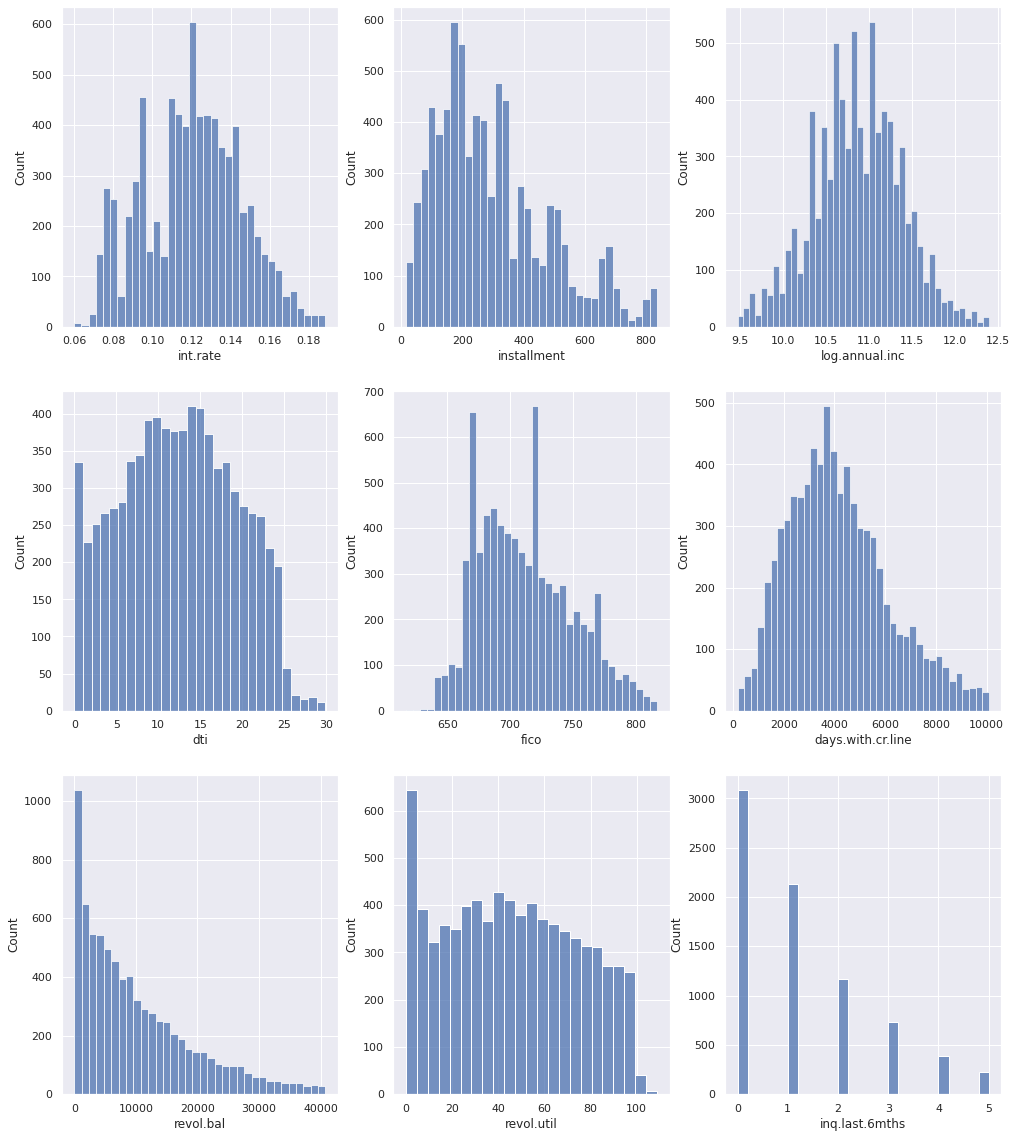

In [51]:
f, axes = plt.subplots(3, 3,figsize=(15, 20))
sns.set_theme(style="whitegrid")
sns.histplot(x=X['int.rate'],ax=axes[0,0])
sns.histplot(x=X['installment'],ax=axes[0,1])
sns.histplot(x=X['log.annual.inc'],ax=axes[0,2])
sns.histplot(x=X['dti'],ax=axes[1,0])
sns.histplot(x=X['fico'],ax=axes[1,1])
sns.histplot(x=X['days.with.cr.line'],ax=axes[1,2])
sns.histplot(x=X['revol.bal'],ax=axes[2,0])
sns.histplot(x=X['revol.util'],ax=axes[2,1])
sns.histplot(x=X['inq.last.6mths'],ax=axes[2,2])

**Boxplots without outliers**

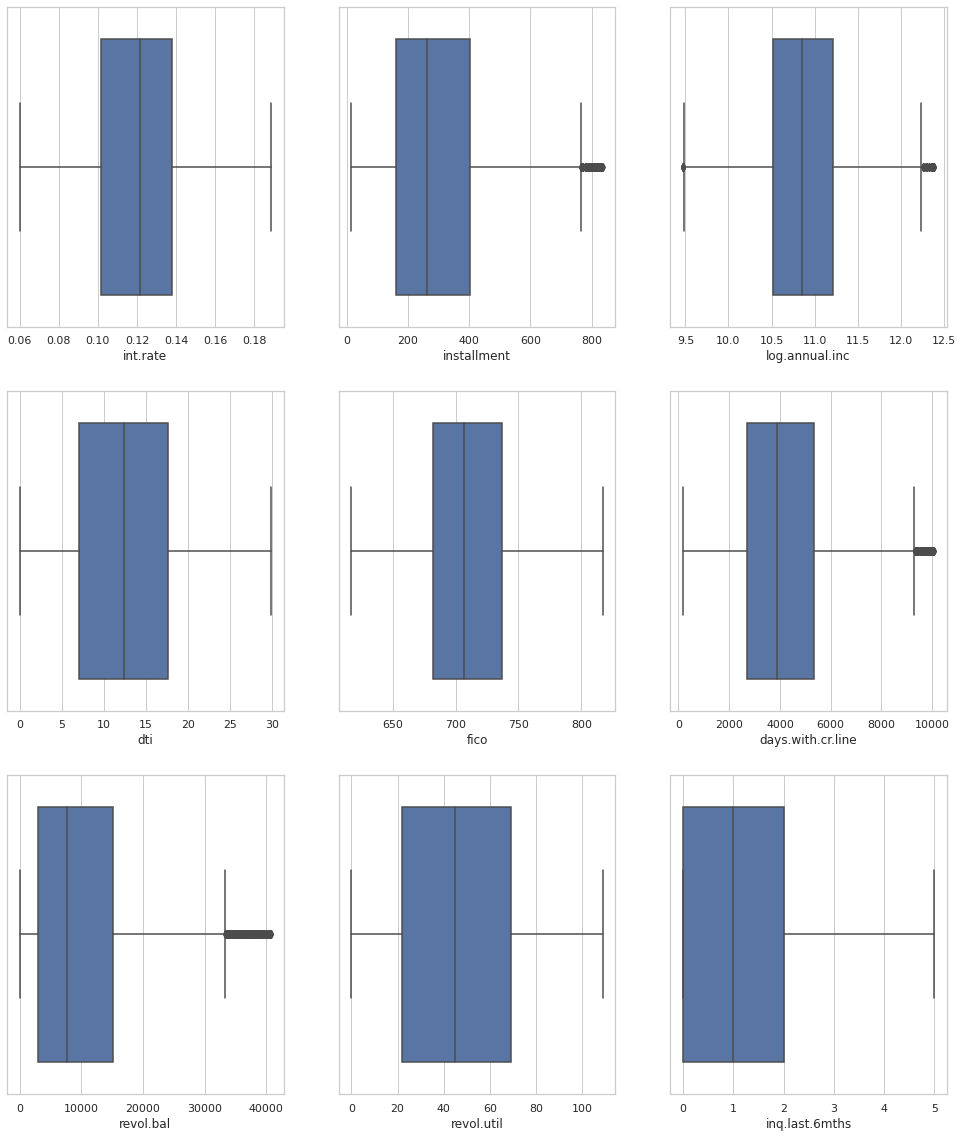

In [52]:
f, axes = plt.subplots(3, 3,figsize=(15, 20))
sns.set_theme(style="darkgrid")
sns.boxplot(x=X['int.rate'],ax=axes[0,0])
sns.boxplot(x=X['installment'],ax=axes[0,1])
sns.boxplot(x=X['log.annual.inc'],ax=axes[0,2])
sns.boxplot(x=X['dti'],ax=axes[1,0])
sns.boxplot(x=X['fico'],ax=axes[1,1])
sns.boxplot(x=X['days.with.cr.line'],ax=axes[1,2])
sns.boxplot(x=X['revol.bal'],ax=axes[2,0])
sns.boxplot(x=X['revol.util'],ax=axes[2,1])
sns.boxplot(x=X['inq.last.6mths'],ax=axes[2,2])

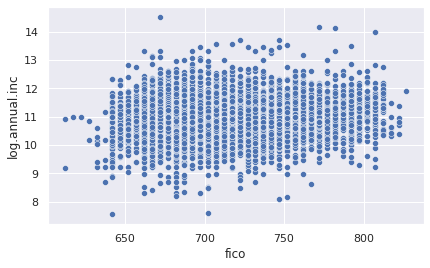

In [53]:
# Plot fico-score against log annual income
sns.scatterplot(x=df['fico'],y=df['log.annual.inc'])

#**Exploratory Data Analysis**

In [54]:
# Get an understanding for which variables are important, view summary statistics, and visualize the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      9578 non-null   int64   
 1   purpose            9578 non-null   object  
 2   int.rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log.annual.inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days.with.cr.line  9578 non-null   float64 
 8   revol.bal          9578 non-null   int64   
 9   revol.util         9578 non-null   float64 
 10  inq.last.6mths     9578 non-null   int64   
 11  delinq.2yrs        9578 non-null   int64   
 12  pub.rec            9578 non-null   int64   
 13  not.fully.paid     9578 non-null   int64   
 14  fico_rating        9578 non-null   category
dtypes: category(1), float64(6), int64(7), object(1)
memory 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Observations')

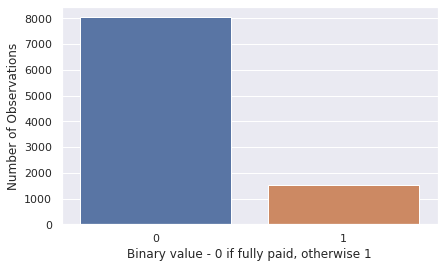

In [55]:
repayment_stat = df.iloc[0:, 13]
repayment_stat.head()
sns.set_theme(style="darkgrid")
sns.countplot(repayment_stat)
plt.xlabel("Binary value - 0 if fully paid, otherwise 1")
plt.ylabel("Number of Observations")

**Calculate default rate**

In [56]:
repayment_stat.value_counts()
default = 1533
non_default = 8045
default_rate = default/(default + non_default)
print(default_rate*100) # in percentage

16.005429108373356


**Heatmap**

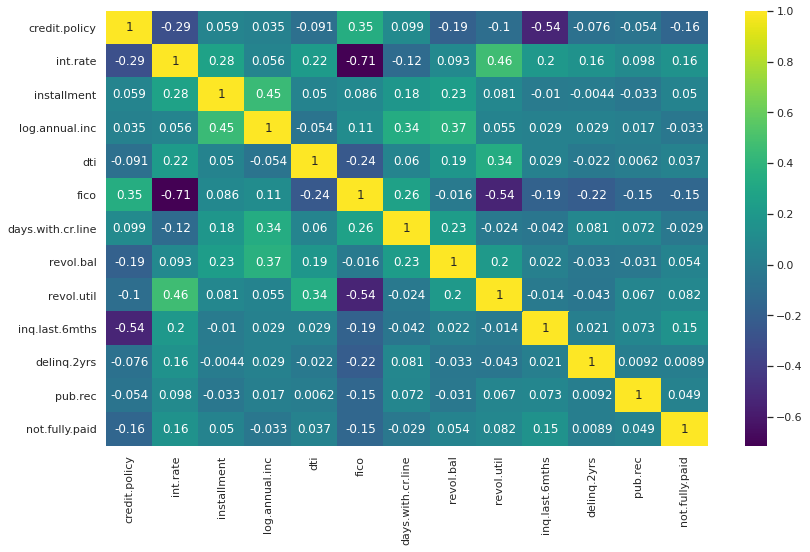

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# we observe that fico score and int. rate is almost perfectly negatively correlated (highly correlated, information duplication?)
# the same is evident between credit policy and inq.last.6mnths
# correlation is important, it provides evidence, that our variables are not superfluous 

**Other descriptive statistics**

In [58]:
from scipy import stats 

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

Text(0.5, 0, 'FICO')

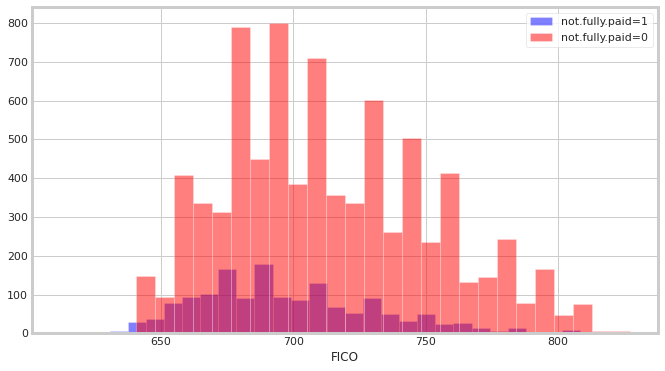

In [59]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

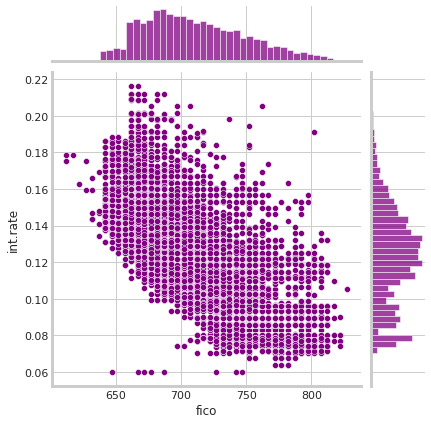

In [60]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

#**Data Visualizations Part 2: Plot one Feature against Dependent Variable in each Graph**

In [61]:
# Show correlations of absolute values (not taking into account the algebraic sign)
df_merged_final.corr().repaid.abs().sort_values(ascending=False)

repaid               1.00
int.rate             0.16
credit.policy        0.16
fico                 0.15
inq.last.6mths       0.15
small_business       0.08
revol.util           0.08
revol.bal            0.05
installment          0.05
pub.rec              0.05
credit_card          0.05
dti                  0.04
log.annual.inc       0.03
days.with.cr.line    0.03
major_purchase       0.03
educational          0.02
debt_consolidation   0.02
delinq.2yrs          0.01
home_improvement     0.01
Name: repaid, dtype: float64

Text(0.5, 1.0, 'Repaid Status grouped by Fico Rating')

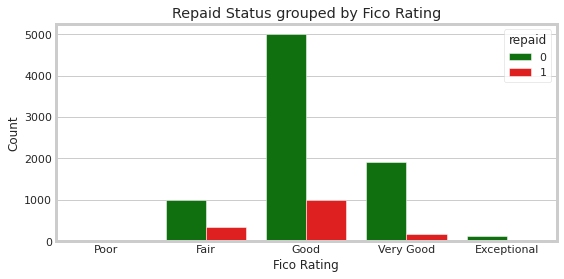

In [62]:
plt.figure(figsize=(8,4))
sns.countplot(x='fico_rating', data = df_merged_final, hue='repaid', palette=['green','red'])
plt.xlabel('Fico Rating')
plt.ylabel('Count')
plt.title('Repaid Status grouped by Fico Rating')

Text(0.5, 1.0, 'Repaid Status grouped by Loan Purpose')

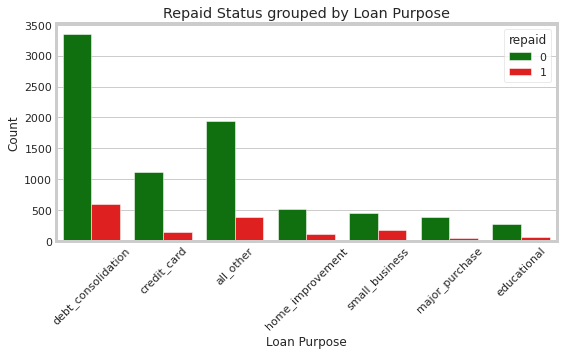

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x='purpose', data = df_merged, hue='repaid', palette=['green','red'])
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Repaid Status grouped by Loan Purpose')

Text(0.5, 1.0, 'Repaid Status grouped by Credit Policy')

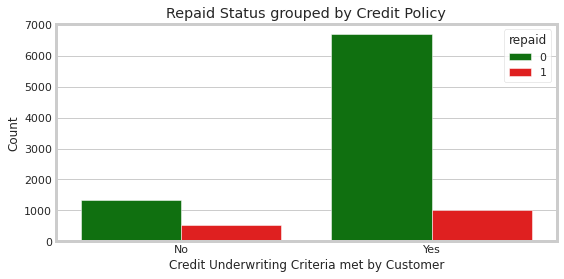

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x='credit.policy', data = df_merged_final, hue='repaid', palette=['green','red'])
plt.xlabel('Credit Underwriting Criteria met by Customer')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.title('Repaid Status grouped by Credit Policy')

In [65]:
df_merged_final['repaid'].value_counts()

0    8045
1    1533
Name: repaid, dtype: int64

In [66]:
df_merged_final['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [67]:
df_merged_final['repaid'].value_counts()

0    8045
1    1533
Name: repaid, dtype: int64

[]

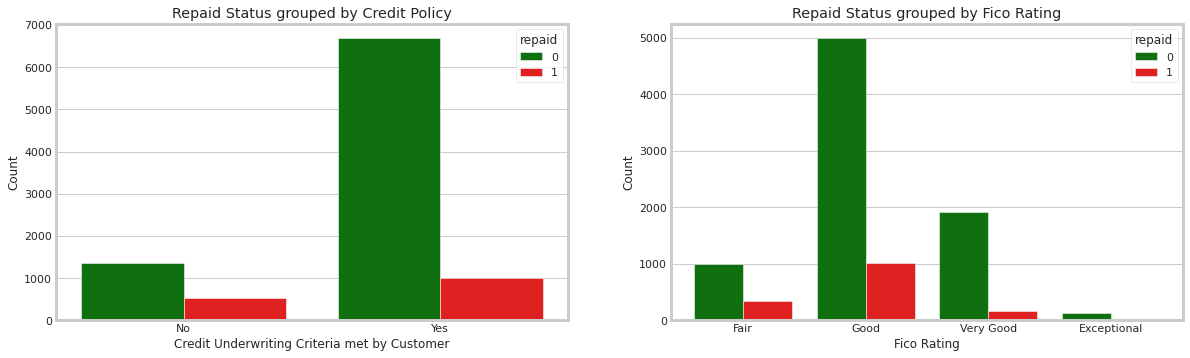

In [68]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='credit.policy', data = df_merged_final, hue='repaid', palette=['green','red'])
plt.xlabel('Credit Underwriting Criteria met by Customer')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.title('Repaid Status grouped by Credit Policy')


plt.subplot(2,2,2)
sns.countplot(x='fico_rating', data = df_merged_final, hue='repaid', palette=['green','red'])
plt.title('Repaid Status grouped by Fico Rating')
plt.xlabel('Fico Rating')
plt.ylabel('Count')
plt.plot()

In [69]:
# Show ratios for different purposes and include story in presentation for loan purpose


Text(0.5, 1.0, 'Repaid Status grouped by number of inquiries in the last six months')

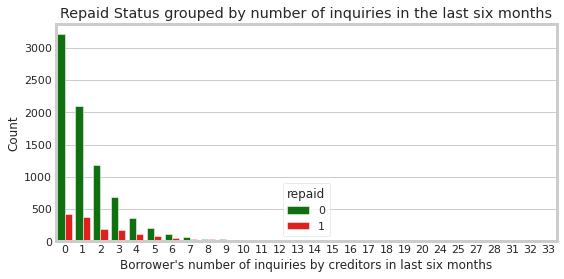

In [70]:
plt.figure(figsize=(8,4))
sns.countplot(x='inq.last.6mths', data = df_merged_final, hue='repaid', palette=['green','red'])
plt.xlabel('Borrower\'s number of inquiries by creditors in last six months')
plt.ylabel('Count')
plt.title('Repaid Status grouped by number of inquiries in the last six months')
# Too many x-values, run again below with filtered dataframe

Text(0.5, 1.0, 'Repaid Status grouped by number of inquiries in the last six months')

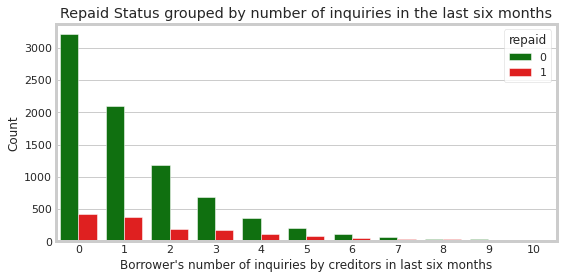

In [71]:
df_inq_plot = df_merged_final[df_merged_final['inq.last.6mths'] <= 10]
plt.figure(figsize=(8,4))
sns.countplot(x='inq.last.6mths', data = df_inq_plot, hue='repaid', palette=['green','red'])
plt.xlabel('Borrower\'s number of inquiries by creditors in last six months')
plt.ylabel('Count')
plt.title('Repaid Status grouped by number of inquiries in the last six months')

Text(0.5, 1.0, 'Repaid Status grouped by Interest Rate')

<Figure size 576x288 with 0 Axes>

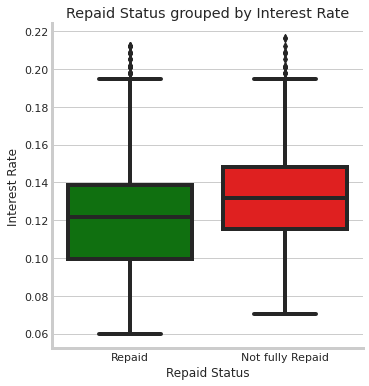

In [72]:
plt.figure(figsize=(8,4))
sns.catplot(x="repaid", y="int.rate", kind="box", data=df_merged_final, palette=['green','red'])
plt.xlabel('Repaid Status')
plt.ylabel('Interest Rate')
plt.xticks([0, 1], ['Repaid', 'Not fully Repaid']) 
plt.title('Repaid Status grouped by Interest Rate')

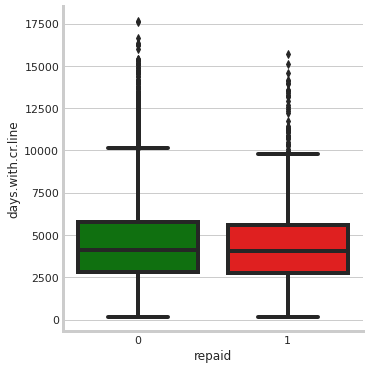

In [73]:
sns.catplot(x="repaid", y="days.with.cr.line", kind="box", data=df_merged_final,palette=['green','red'])

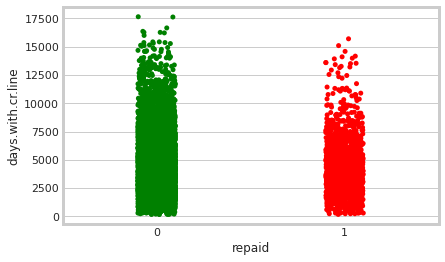

In [74]:
sns.stripplot(x="repaid", y="days.with.cr.line", data = df_merged_final, palette=['green','red'])

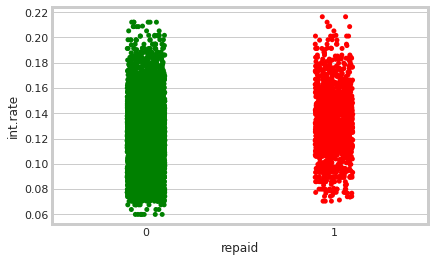

In [75]:
sns.stripplot(x="repaid", y="int.rate", data=df_merged_final, palette=['green','red'])

Text(0.5, 0.98, 'Repaid Status grouped by Number of Inquiries in Last Six Months')

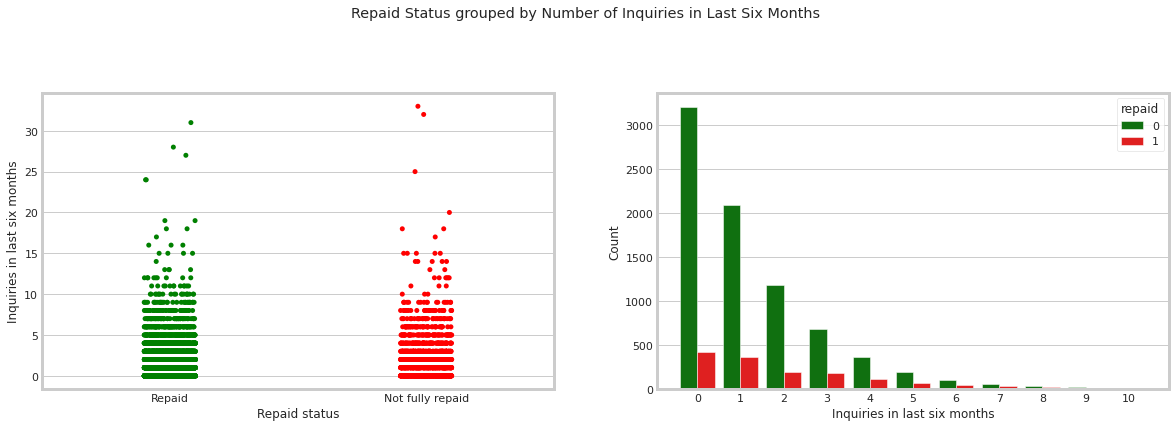

In [76]:
# Plot inq.last.6mths
df_inq_plot = df_merged_final[df_merged_final['inq.last.6mths'] <= 10]

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.stripplot(x="repaid", y="inq.last.6mths", data=df_merged_final, palette=['green','red'])
plt.xlabel('Repaid status')
plt.ylabel('Inquiries in last six months')
plt.xticks([0, 1], ['Repaid', 'Not fully repaid']) 
#plt.title('Repaid Status grouped by inq. last 6 mths')


plt.subplot(2,2,2)
sns.countplot(x='inq.last.6mths', data = df_inq_plot, hue='repaid', palette=['green','red'])
#plt.title('Repaid Status grouped by inq. last six mths')
plt.xlabel('Inquiries in last six months')
plt.ylabel('Count')
plt.plot()
plt.suptitle('Repaid Status grouped by Number of Inquiries in Last Six Months', fontsize="x-large")

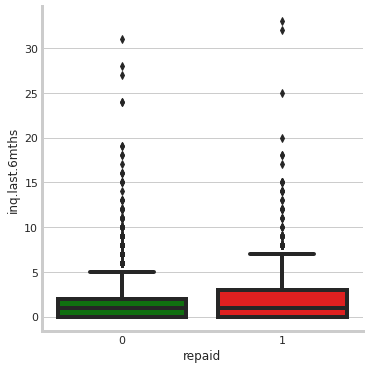

In [77]:
sns.catplot(x="repaid", y="inq.last.6mths", kind="box", data=df_merged_final,palette=['green','red'])

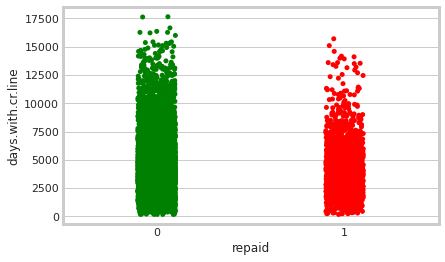

In [78]:
sns.stripplot(x="repaid", y="days.with.cr.line", data=df_merged_final, palette=['green','red'])

#**Feature Selection: PCA Analysis**

In [82]:
# Import packages
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

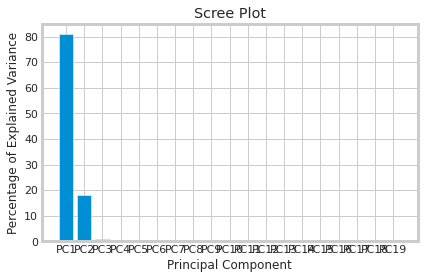

In [83]:
# Center and scale the data
# convert df since python cannot convert string to float
df_PCA = df_merged_final.drop('fico_rating', axis='columns')
# Load column names in list
column_names = list(df_PCA.columns.values)

scaled_data = preprocessing.scale(df_PCA.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) # perccentage of variance explained per Principal Component
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

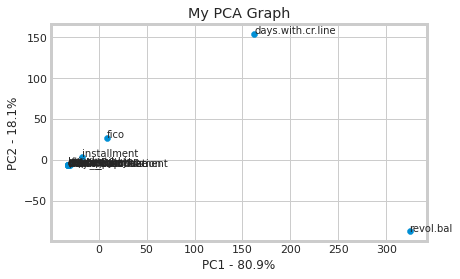

In [84]:
pca_df = pd.DataFrame(pca_data, index=column_names, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

**Decision Tree Graph and Feature Importance Plot**

In [85]:
df_target_dt = df_merged_final[['repaid']]
df_variables_dt = df_merged_final.drop(['repaid','fico_rating'], axis='columns')

X_dt = df_variables_dt
y_dt = df_target_dt

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt,y_dt, test_size = 0.2, random_state = 42)

#Train classifier
decision_tree_clf_dt = tree.DecisionTreeClassifier(random_state=42, max_depth=10)
decision_tree_clf_dt = decision_tree_clf_dt.fit(X_train_dt, y_train_dt) #Machine learning

# Create lists for visualization
feature_names_dt = df_variables_dt.columns.values.tolist()
feature_names_dt 

target_names_dt = ['0','1']

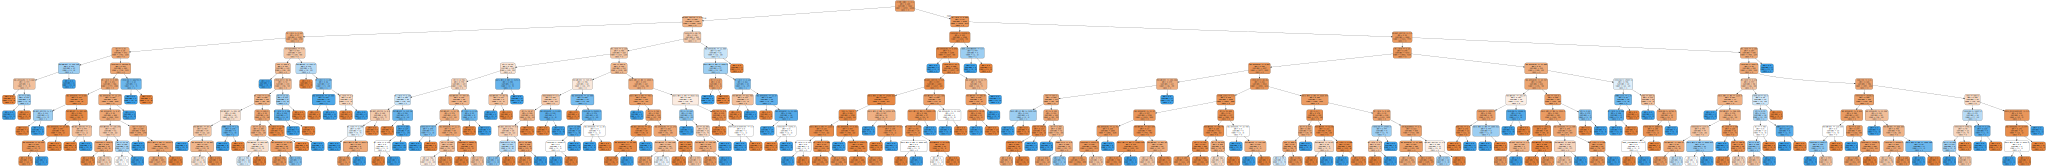

In [86]:
#Visualizing the tree
from graphviz import Source
from sklearn.tree import export_graphviz
import os
export_graphviz(
        decision_tree_clf_dt,
        out_file=os.path.join("", "iris_tree.dot"),
        feature_names = feature_names_dt, # create list 
        class_names = target_names_dt,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("", "iris_tree.dot"))

In [87]:
decision_tree_clf_dt.feature_importances_
#df_variables_dt is dataframe without columns 'repaid' and 'fico_rating'

array([0.09155507, 0.15048215, 0.13931523, 0.13365962, 0.11419923,
       0.05268711, 0.08337839, 0.08250734, 0.03239801, 0.05897856,
       0.01559324, 0.01033977, 0.00331936, 0.00438574, 0.00758954,
       0.00819543, 0.        , 0.01141621])

In [88]:
df_importance = pd.DataFrame({'Feature_names':df_variables_dt.columns,'Importances':decision_tree_clf_dt.feature_importances_})
df_importance_sorted = df_importance.sort_values(by='Importances',ascending=False)
df_importance_sorted

,Feature_names,Importances
1,int.rate,0.15
2,installment,0.14
3,log.annual.inc,0.13
4,dti,0.11
0,credit.policy,0.09
6,days.with.cr.line,0.08
7,revol.bal,0.08
9,inq.last.6mths,0.06
5,fico,0.05
8,revol.util,0.03


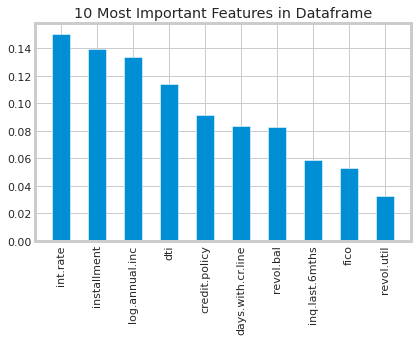

In [89]:
df_ten_most_important = df_importance_sorted[:10]
plt.bar(df_ten_most_important['Feature_names'],df_ten_most_important['Importances'],width=0.5)
plt.xticks(rotation='vertical')
plt.title('10 Most Important Features in Dataframe')
plt.show()

#**Conduct Oversampling** 

**Conduct oversampling on normalized Dataframe for Dependent Variable Repaid == 1**

Random over-sampling:
1    8045
0    8045
Name: repaid, dtype: int64


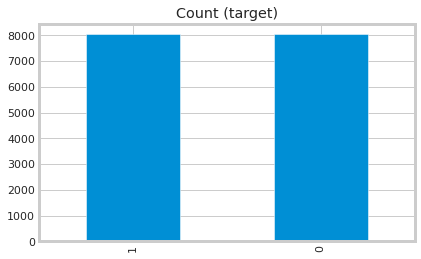

In [90]:
# prepare subgroups
default = df_merged_final[df_merged_final['repaid']==1]
non_default = df_merged_final[df_merged_final['repaid']==0]
count_class_0, count_class_1 = df_merged_final.iloc[:, 12].value_counts()

df_class_0 = df_merged_final[df_merged_final['repaid'] == 0]
df_class_1 = df_merged_final[df_merged_final['repaid'] == 1]

# conduct oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.iloc[:, 12].value_counts())

df_over.iloc[:, 12].value_counts().plot(kind='bar', title='Count (target)')

**Conduct oversampling on normalized Dataframe for Dependent Variable Repaid == 0**

Random over-sampling:
1.00    8045
0.00    8045
Name: repaid, dtype: int64


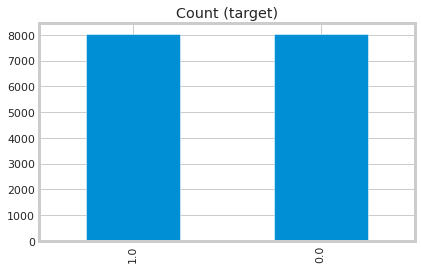

In [91]:
# prepare subgroups
default_norm = df_merged_final_norm[df_merged_final_norm['repaid']==1]
non_default_norm = df_merged_final_norm[df_merged_final_norm['repaid']==0]
count_class_0_norm, count_class_1_norm = df_merged_final_norm.iloc[:, 12].value_counts()

df_class_0_norm = df_merged_final_norm[df_merged_final_norm['repaid'] == 0]
df_class_1_norm = df_merged_final_norm[df_merged_final_norm['repaid'] == 1]

# conduct oversampling
df_class_1_over_norm = df_class_1_norm.sample(count_class_0_norm, replace=True)
df_over_norm = pd.concat([df_class_0_norm, df_class_1_over_norm], axis=0)

print('Random over-sampling:')
print(df_over_norm.iloc[:, 12].value_counts())

df_over_norm.iloc[:, 12].value_counts().plot(kind='bar', title='Count (target)')

**Conduct oversampling on normalized dataframe without outliers for DV Repaid == 1**

Random over-sampling:
1.00    6647
0.00    6647
Name: repaid, dtype: int64


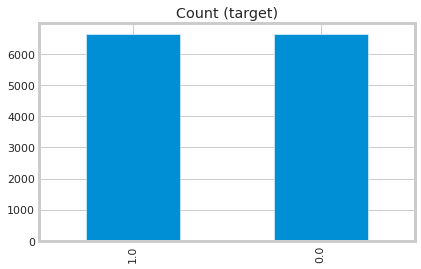

In [92]:
# prepare subgroups
default_dropout = df_dropout[df_dropout['repaid']==1]
non_default_dropout = df_dropout[df_dropout['repaid']==0]
count_class_0_dropout, count_class_1_dropout = df_dropout.iloc[:, 12].value_counts()

df_class_0_dropout = df_dropout[df_dropout['repaid'] == 0]
df_class_1_dropout = df_dropout[df_dropout['repaid'] == 1]

# conduct oversampling
df_class_1_over_dropout = df_class_1_dropout.sample(count_class_0_dropout, replace=True)
df_over_dropout = pd.concat([df_class_0_dropout, df_class_1_over_dropout], axis=0)

print('Random over-sampling:')
print(df_over_dropout.iloc[:, 12].value_counts())

df_over_dropout.iloc[:, 12].value_counts().plot(kind='bar', title='Count (target)')

#**Decision Tree Analysis**

**Decision Tree Analysis on original Dataframe without oversampling**


In [93]:
#import packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [94]:
df_target = df_merged_final[['repaid']]
df_variables = df_merged_final.drop(['repaid','fico_rating'], axis='columns')

X = df_variables
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Train classifier
decision_tree_clf = tree.DecisionTreeClassifier()
decision_tree_clf = decision_tree_clf.fit(X_train,y_train) #Machine learning

# Create lists for visualization
feature_names = df_variables.columns.values.tolist()
feature_names 

decision_tree_clf.feature_importances_ #Observe how the last two columns (petal length and width) have more importance than the first two (sepal length and width)

y_pred = decision_tree_clf.predict(X_test) #y_test has the actual labels, but y_pred has the predicted labels

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.21      0.23      0.22       305

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.74      0.74      1916



**Decision Tree Analysis on normalized Dataframe without oversampling**

In [95]:
df_target_norm = df_merged_final_norm[['repaid']]
df_variables_norm = df_merged_final_norm.drop('repaid', axis='columns')

X_norm = df_variables_norm
y_norm = df_target_norm

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,y_norm, test_size = 0.2, random_state = 42)

#Train classifier
decision_tree_clf_norm = tree.DecisionTreeClassifier()
decision_tree_clf_norm = decision_tree_clf_norm.fit(X_train_norm,y_train_norm)

# Create lists for visualization
feature_names_norm = df_variables_norm.columns.values.tolist()

decision_tree_clf_norm.feature_importances_ #Observe how the last two columns (petal length and width) have more importance than the first two (sepal length and width)

y_pred_norm = decision_tree_clf_norm.predict(X_test_norm) #y_test has the actual labels, but y_pred has the predicted labels

confusion_matrix_norm = metrics.confusion_matrix(y_test_norm, y_pred_norm)
print(confusion_matrix_norm)

print(metrics.classification_report(y_test_norm, y_pred_norm))

[[1333  278]
 [ 236   69]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1611
         1.0       0.20      0.23      0.21       305

    accuracy                           0.73      1916
   macro avg       0.52      0.53      0.53      1916
weighted avg       0.75      0.73      0.74      1916



**Decision Tree Analysis on non-normalized, oversampled Dataframe using all variables**

In [96]:
# Conduct Decision Tree analysis on oversampled dataframe using all columns
df_target_over = df_over[['repaid']]
df_variables_over = df_over.drop(['repaid','fico_rating'], axis='columns')

X_over = df_variables_over
y_over = df_target_over

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over, test_size = 0.2, random_state = 42) 

#Train classifier
decision_tree_clf_over = tree.DecisionTreeClassifier(random_state=42, max_depth = 20)
decision_tree_clf_over = decision_tree_clf_over.fit(X_train_over, y_train_over) #Machine learning

y_pred_over = decision_tree_clf_over.predict(X_test_over) #y_test has the actual labels, but y_pred has the predicted labels

confusion_matrix_over = metrics.confusion_matrix(y_test_over, y_pred_over)
print(confusion_matrix_over)

print(metrics.classification_report(y_test_over, y_pred_over))

[[1252  326]
 [  44 1596]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1578
           1       0.83      0.97      0.90      1640

    accuracy                           0.89      3218
   macro avg       0.90      0.88      0.88      3218
weighted avg       0.90      0.89      0.88      3218



**Decision Tree Analysis on normalized, oversampled Dataframe using all variables**

In [97]:
# Conduct Decision Tree analysis on oversampled, normalized dataframe using all columns
df_target_over_2 = df_over_norm[['repaid']]
df_variables_over_2 = df_over_norm.drop(['repaid'], axis='columns')

X_over_2 = df_variables_over_2
y_over_2 = df_target_over_2

X_train_over_2, X_test_over_2, y_train_over_2, y_test_over_2 = train_test_split(X_over_2,y_over_2, test_size = 0.2, random_state = 42) 

#Train classifier
decision_tree_clf_over_2 = tree.DecisionTreeClassifier(random_state=42, max_depth = 20)
decision_tree_clf_over_2 = decision_tree_clf_over_2.fit(X_train_over_2, y_train_over_2) #Machine learning

y_pred_over_2 = decision_tree_clf_over_2.predict(X_test_over_2) #y_test has the actual labels, but y_pred has the predicted labels

confusion_matrix_over_2 = metrics.confusion_matrix(y_test_over_2, y_pred_over_2)
print(confusion_matrix_over_2)

print(metrics.classification_report(y_test_over_2, y_pred_over_2))

[[1176  402]
 [  31 1609]]
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84      1578
         1.0       0.80      0.98      0.88      1640

    accuracy                           0.87      3218
   macro avg       0.89      0.86      0.86      3218
weighted avg       0.89      0.87      0.86      3218



**Decision Tree Analysis on normalized, oversampled Dataframe using reduced dimensions**

In [98]:
# Conduct Decision Tree analysis on oversampled dataframe using columns from pca analysis
df_target_norm_over_red = df_over_norm[['repaid']]
df_variables_norm_over_red = df_over_norm[['int.rate','days.with.cr.line','revol.bal']]

X_norm_over_red = df_variables_norm_over_red
y_norm_over_red = df_target_norm_over_red

X_train_norm_over_red, X_test_norm_over_red, y_train_norm_over_red, y_test_norm_over_red = train_test_split(X_norm_over_red,y_norm_over_red, test_size = 0.2, random_state = 42)

#Train classifier
decision_tree_clf_norm_over_red = tree.DecisionTreeClassifier(random_state=42, max_depth = 20)
decision_tree_clf_norm_over_red = decision_tree_clf_norm_over_red.fit(X_train_norm_over_red, y_train_norm_over_red)

y_pred_norm_over_red = decision_tree_clf_norm_over_red.predict(X_test_norm_over_red) #y_test has the actual labels, but y_pred has the predicted labels

confusion_matrix_norm_over_red = metrics.confusion_matrix(y_test_norm_over_red, y_pred_norm_over_red)
print(confusion_matrix_norm_over_red)

print(metrics.classification_report(y_test_norm_over_red, y_pred_norm_over_red))

[[1207  371]
 [ 188 1452]]
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81      1578
         1.0       0.80      0.89      0.84      1640

    accuracy                           0.83      3218
   macro avg       0.83      0.83      0.83      3218
weighted avg       0.83      0.83      0.83      3218



In [99]:
# Conduct Decision Tree analysis on oversampled dataframe using columns from pca analysis
df_target_norm_over_red = df_over_norm[['repaid']]
df_variables_norm_over_red = df_over_norm[['fico','days.with.cr.line','revol.bal']]

X_norm_over_red = df_variables_norm_over_red
y_norm_over_red = df_target_norm_over_red

X_train_norm_over_red, X_test_norm_over_red, y_train_norm_over_red, y_test_norm_over_red = train_test_split(X_norm_over_red,y_norm_over_red, test_size = 0.2, random_state = 42)

#Train classifier
decision_tree_clf_norm_over_red = tree.DecisionTreeClassifier(random_state=42, max_depth = 20)
decision_tree_clf_norm_over_red = decision_tree_clf_norm_over_red.fit(X_train_norm_over_red, y_train_norm_over_red)

y_pred_norm_over_red = decision_tree_clf_norm_over_red.predict(X_test_norm_over_red) #y_test has the actual labels, but y_pred has the predicted labels

confusion_matrix_norm_over_red = metrics.confusion_matrix(y_test_norm_over_red, y_pred_norm_over_red)
print(confusion_matrix_norm_over_red)

print(metrics.classification_report(y_test_norm_over_red, y_pred_norm_over_red))

[[1212  366]
 [ 173 1467]]
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      1578
         1.0       0.80      0.89      0.84      1640

    accuracy                           0.83      3218
   macro avg       0.84      0.83      0.83      3218
weighted avg       0.84      0.83      0.83      3218



# **Logistic Regression**

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

**Logistic Regression on oversampled, normalized dataframe using all variables**

In [101]:
# prepare input for model
X_log = df_over_norm.drop(['fico','repaid'], axis='columns')
y_log = df_over_norm[['repaid']].values.ravel() # create 1d array out of dataframe using .ravel()

# Partition data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size = 0.2, random_state = 42)

# Logistic Regression
log = LogisticRegression()
log.fit(X_train_log, y_train_log)

# Calculate predictions on test data
y_pred_log = log.predict(X_test_log)

# Summary statistics
classification_report(y_test_log, y_pred_log)
#confusion_matrix(y_test_log, y_pred_log)
#log.score(X_test_log, y_test_log)
#metrics.classification_report(y_test_log, y_pred_log)
# Accuracy
#print("Accuracy of the model is: ", accuracy_score(y_pred_log, y_test_log))

'              precision    recall  f1-score   support\n\n         0.0       0.60      0.66      0.63      1578\n         1.0       0.64      0.57      0.60      1640\n\n    accuracy                           0.62      3218\n   macro avg       0.62      0.62      0.62      3218\nweighted avg       0.62      0.62      0.61      3218\n'

Text(0.5, 1.0, 'Confusion Matrix for oversampled, normalized dataframe using all variables')

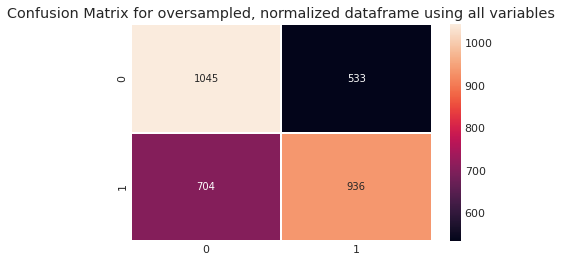

In [102]:
cf_matrix = confusion_matrix(y_test_log, y_pred_log)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix for oversampled, normalized dataframe using all variables')

**Logistic Regression on oversampled, normalized dataframe using reduced variables**



In [103]:
# prepare X using reduced df
X_log_2 = df_over_norm[['int.rate','days.with.cr.line','revol.bal']]
y_log_2 = df_over_norm[['repaid']].values.ravel() # create 1d array out of dataframe using .ravel()

X_train_log_2, X_test_log_2, y_train_log_2, y_test_log_2 = train_test_split(X_log_2, y_log_2, test_size = 0.2, random_state = 42)

# Logistic Regression
log_2 = LogisticRegression()
log_2.fit(X_train_log_2, y_train_log_2)


# Calculate predictions on test data
y_pred_log_2 = log_2.predict(X_test_log_2)

# Summary statistics
classification_report(y_test_log_2, y_pred_log_2)
#confusion_matrix(y_test_log_2, y_pred_log_2)
#log_2.score(X_test_log_2, y_test_log_2)

# Accuracy
#print("Accuracy of the model is: ", accuracy_score(y_pred,y_test_log))

'              precision    recall  f1-score   support\n\n         0.0       0.58      0.58      0.58      1578\n         1.0       0.59      0.58      0.59      1640\n\n    accuracy                           0.58      3218\n   macro avg       0.58      0.58      0.58      3218\nweighted avg       0.58      0.58      0.58      3218\n'

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Oversampled, Normalized Dataframe using Reduced Variables')

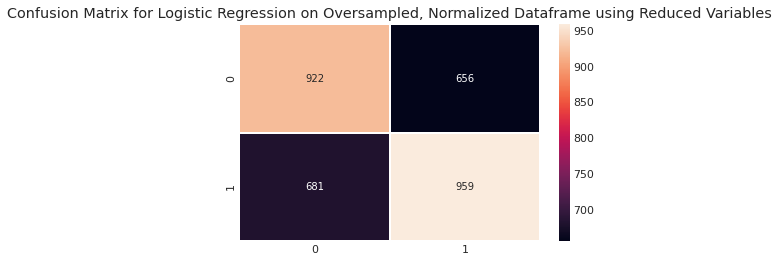

In [104]:
cf_matrix = confusion_matrix(y_test_log_2, y_pred_log_2)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix for Logistic Regression on Oversampled, Normalized Dataframe using Reduced Variables')

 **Logistic Regression on oversampled, normalized dataframe with dropped outliers using reduced dimensions**

In [105]:
df_over_dropout

# prepare X using reduced df
X_dropout = df_over_dropout[['int.rate','days.with.cr.line','revol.bal']]
y_dropout = df_over_dropout[['repaid']].values.ravel() # create 1d array out of dataframe using .ravel()

X_train_dropout, X_test_dropout, y_train_dropout, y_test_dropout = train_test_split(X_dropout, y_dropout, test_size = 0.2, random_state = 42)

# Logistic Regression
log_dropout = LogisticRegression()
log_dropout.fit(X_train_dropout, y_train_dropout)

# Calculate predictions on test data
y_pred_dropout = log_dropout.predict(X_test_dropout)

# Summary statistics
classification_report(y_test_dropout, y_pred_dropout)
#confusion_matrix(y_test_dropout, y_pred_dropout)
#log_2.score(X_test_dropout, y_test_dropout)

# Accuracy
#print("Accuracy of the model is: ", accuracy_score(y_pred_dropout,y_test_dropout))

'              precision    recall  f1-score   support\n\n         0.0       0.58      0.55      0.56      1341\n         1.0       0.57      0.60      0.58      1318\n\n    accuracy                           0.57      2659\n   macro avg       0.57      0.57      0.57      2659\nweighted avg       0.57      0.57      0.57      2659\n'

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Oversampled, Normalized Dataframe without outliers using Reduced Variables')

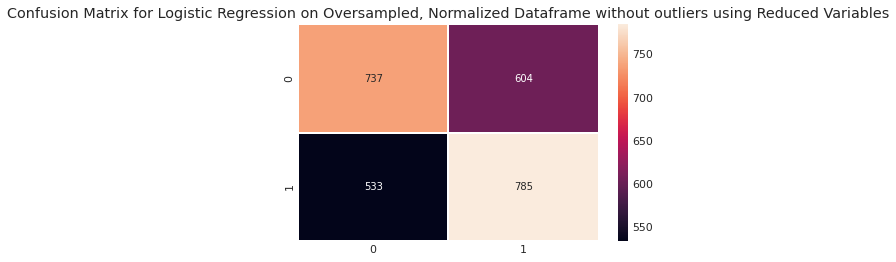

In [106]:
cf_matrix_dropout = confusion_matrix(y_test_dropout, y_pred_dropout)
sns.heatmap(cf_matrix_dropout, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix for Logistic Regression on Oversampled, Normalized Dataframe without outliers using Reduced Variables')

 **Logistic Regression on oversampled, normalized dataframe with dropped outliers using all dimensions except highly correlated ones**

In [107]:
df_over_dropout

# prepare X using reduced df
X_dropout = df_over_dropout.drop(['repaid','fico'],axis='columns')
y_dropout = df_over_dropout[['repaid']].values.ravel() # create 1d array out of dataframe using .ravel()

X_train_dropout, X_test_dropout, y_train_dropout, y_test_dropout = train_test_split(X_dropout, y_dropout, test_size = 0.2, random_state = 42)

# Logistic Regression
log_dropout = LogisticRegression()
log_dropout.fit(X_train_dropout, y_train_dropout)

# Calculate predictions on test data
y_pred_dropout = log_dropout.predict(X_test_dropout)

# Summary statistics
classification_report(y_test_dropout, y_pred_dropout)
#confusion_matrix(y_test_dropout, y_pred_dropout)
#log_2.score(X_test_dropout, y_test_dropout)

# Accuracy
#print("Accuracy of the model is: ", accuracy_score(y_pred_dropout,y_test_dropout))

'              precision    recall  f1-score   support\n\n         0.0       0.61      0.63      0.62      1341\n         1.0       0.62      0.59      0.60      1318\n\n    accuracy                           0.61      2659\n   macro avg       0.61      0.61      0.61      2659\nweighted avg       0.61      0.61      0.61      2659\n'

#**Random Forest Classifier**

**Random Forest Classifier on oversampled, normalized dataframe using all 
variables**

In [117]:
# X_rf = df_over_norm[['int.rate','days.with.cr.line','revol.bal']]
X_rf = df_over_norm.drop('repaid',axis='columns')
y_rf = df_over_norm[['repaid']].values.ravel()

from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, stratify = y_rf, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# clf_rf = RandomForestClassifier().fit(X_train_rf, y_train_rf)

clf_rf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs = -1, random_state = 42)
clf_rf.fit(X_train_rf, y_train_rf)

pred_rf = clf_rf.predict(X_test_rf)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_rf, pred_rf))

              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      1609
         1.0       0.65      0.61      0.63      1609

    accuracy                           0.64      3218
   macro avg       0.64      0.64      0.64      3218
weighted avg       0.64      0.64      0.64      3218



Text(0.5, 1.0, 'Confusion Matrix for Random Forest on Oversampled, Normalized Dataframe using All Variables')

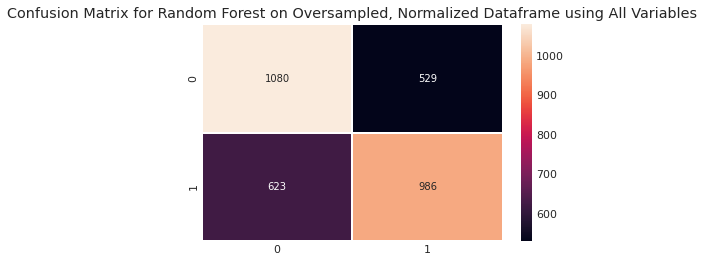

In [118]:
cf_matrix_rf = confusion_matrix(y_test_rf, pred_rf)
sns.heatmap(cf_matrix_rf, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest on Oversampled, Normalized Dataframe using All Variables')

**Random Forest Classifier on oversampled, normalized dataframe using reduced variables**

In [119]:
X_rf_2 = df_over_norm[['fico','days.with.cr.line','revol.bal']]
y_rf_2 = df_over_norm[['repaid']].values.ravel()

from sklearn.model_selection import train_test_split

X_train_rf_2, X_test_rf_2, y_train_rf_2, y_test_rf_2 = train_test_split(X_rf_2, y_rf_2, test_size=0.2, stratify = y_rf_2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# clf_rf = RandomForestClassifier().fit(X_train_rf, y_train_rf)

clf_rf_2 = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs = -1, random_state = 42)
clf_rf_2.fit(X_train_rf_2, y_train_rf_2)

pred_rf_2 = clf_rf_2.predict(X_test_rf_2)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_rf_2, pred_rf_2))

              precision    recall  f1-score   support

         0.0       0.63      0.50      0.56      1609
         1.0       0.59      0.70      0.64      1609

    accuracy                           0.60      3218
   macro avg       0.61      0.60      0.60      3218
weighted avg       0.61      0.60      0.60      3218



Text(0.5, 1.0, 'Confusion Matrix for Random Forest on Oversampled, Normalized Dataframe using Reduced Variables')

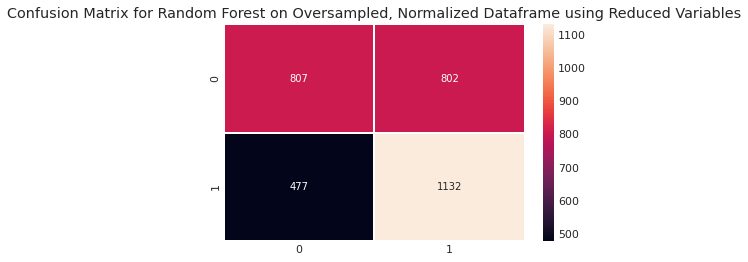

In [120]:
cf_matrix_rf_2 = confusion_matrix(y_test_rf_2, pred_rf_2)
sns.heatmap(cf_matrix_rf_2, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest on Oversampled, Normalized Dataframe using Reduced Variables')

**Hyperparameter Tunig for Random Forest: RandomizedSearchCV**

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

In [122]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Specify range of values for important hyperparameters**

In [123]:
n_estimator_list = list(range(10,220,50)) # nr. of trees that will be part of random forest
criterion_list = ['gini','entropy'] # How is best fit calculated
max_depth_list = list(range(5,41,10)) # 
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5,41,10))]
min_samples_leaf_list = [x/1000 for x in list(range(5,41,10))]
max_features_list = ['sqrt','log2']

# Dictionary containing all hyperparameter values, used for RandomizedSearchCV
params_grid = {
    'n_estimators': n_estimator_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k]) # calculate amount of possible hyperparameter combinations

print('Number of combinations = ',num_combinations)
params_grid

Number of combinations =  1600


{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'n_estimators': [10, 60, 110, 160, 210]}

In [124]:
def my_roc_auc_score(model,X,y): return metrics.roc_auc_score(y, model.predict(X))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid, # dictionary with all possible parameter values
                              n_iter=50, # not all combinations of different hyperparameter values are tried out, only 50 out of 1600
                              cv=3, # data will be split into three different parts for cross-validation, two will be used for traing, one will be used for validation
                              scoring=my_roc_auc_score, # scoring metric used
                              return_train_score=True, 
                              verbose=2)

# hyperparameter tuning for Random Forest Classifier on oversampled, normalized dataframe using all variables
model_rf.fit(X_rf, y_rf)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=10, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=None, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=None, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=None, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=None, criterion=entropy, total=   0.2s
[CV] n_estimators=10, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=None, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=0.015, min_samples_leaf=0.015, max_features=sqrt, max_depth=None, criterion=entropy, total=   0.2s
[CV] n_estimators=160, min_samples_split=0.005, min_samples_leaf=0.035, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=160, min_samples_split=0.005, min_samples_leaf=0.035, max_features=log2, max_depth=15, criterion=entropy, total=   1.6s
[CV] n_estimators=160, min_samples_split=0.005, min_samples_leaf=0.035, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=160, min_samples_split=0.005, min_samples_leaf=0.035, max_features=log2, max_depth=15, criterion=entropy, total=   1.6s
[CV] n_estimators=160, min_samples_split=0.005, min_samples_leaf=0.03

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [125]:
model_rf_2 = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid, # dictionary with all possible parameter values
                              n_iter=50, # not all combinations of different hyperparameter values are tried out, only 50 out of 1600
                              cv=3, # data will be split into three different parts for cross-validation, two will be used for traing, one will be used for validation
                              scoring=my_roc_auc_score, # scoring metric used
                              return_train_score=True, 
                              verbose=2)

# hyperparameter tuning for Random Forest Classifier on oversampled, normalized dataframe using reduced variables
model_rf_2.fit(X_rf_2, y_rf_2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=10, min_samples_split=0.025, min_samples_leaf=0.005, max_features=sqrt, max_depth=25, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=0.025, min_samples_leaf=0.005, max_features=sqrt, max_depth=25, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=0.025, min_samples_leaf=0.005, max_features=sqrt, max_depth=25, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=0.025, min_samples_leaf=0.005, max_features=sqrt, max_depth=25, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=0.025, min_samples_leaf=0.005, max_features=sqrt, max_depth=25, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=0.025, min_samples_leaf=0.005, max_features=sqrt, max_depth=25, criterion=entropy, total=   0.1s
[CV] n_estimators=210, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini 
[CV]  n_estimators=210, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini, total=   1.6s
[CV] n_estimators=210, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini 
[CV]  n_estimators=210, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sqrt, max_depth=15, criterion=gini, total=   1.7s
[CV] n_estimators=210, min_samples_split=0.035, min_samples_leaf=0.005, max_features=sq

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [126]:
# Show best combination for hyperparameters for Random Forest Classifier on oversampled, normalized dataframe using all variables
model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.005,
 'n_estimators': 60}

In [127]:
# Show best combination for hyperparameters for Random Forest Classifier on oversampled, normalized dataframe using reduced variables
model_rf_2.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.005,
 'n_estimators': 110}

**Create final model and evaluate performance for oversampled, normalized dataframe using all variables**

In [128]:
model_rf_fin = RandomForestClassifier(criterion = 'entropy',
                                      max_depth = 35,
                                      max_features = 'log2',
                                      min_samples_leaf = 0.005,
                                      min_samples_split = 0.005,
                                      n_estimators = 210)
model_rf_fin.fit(X_rf,y_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=35, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.005, min_samples_split=0.005,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
print(classification_report(y_rf, model_rf_fin.predict(X_rf)))

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72      8045
         1.0       0.72      0.75      0.73      8045

    accuracy                           0.72     16090
   macro avg       0.73      0.72      0.72     16090
weighted avg       0.73      0.72      0.72     16090



**Create final model and evaluate performance for oversampled, normalized dataframe using reduced variables**

In [130]:
model_rf_fin_2 = RandomForestClassifier(criterion = 'entropy',
                                        max_depth = 35,
                                        max_features = 'log2',
                                        min_samples_leaf = 0.005,
                                        min_samples_split = 0.005,
                                        n_estimators = 210)
model_rf_fin_2.fit(X_rf_2,y_rf_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=35, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.005, min_samples_split=0.005,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
print(classification_report(y_rf_2, model_rf_fin_2.predict(X_rf_2)))

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66      8045
         1.0       0.66      0.70      0.68      8045

    accuracy                           0.67     16090
   macro avg       0.67      0.67      0.67     16090
weighted avg       0.67      0.67      0.67     16090

